In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%qtconsole
%config InlineBackend.figure_format = 'retina'

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
video = cv2.VideoCapture('../Raw-Data/vx1_JZ1/raw/20161121/20161121_JZ1_02.1.mp4')
frame_size = (int(video.get(3)), int(video.get(4)))
frame_rate = video.get(5)
n_frames = int(video.get(7))

In [4]:
is_grabbed, frame = video.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
video.release()

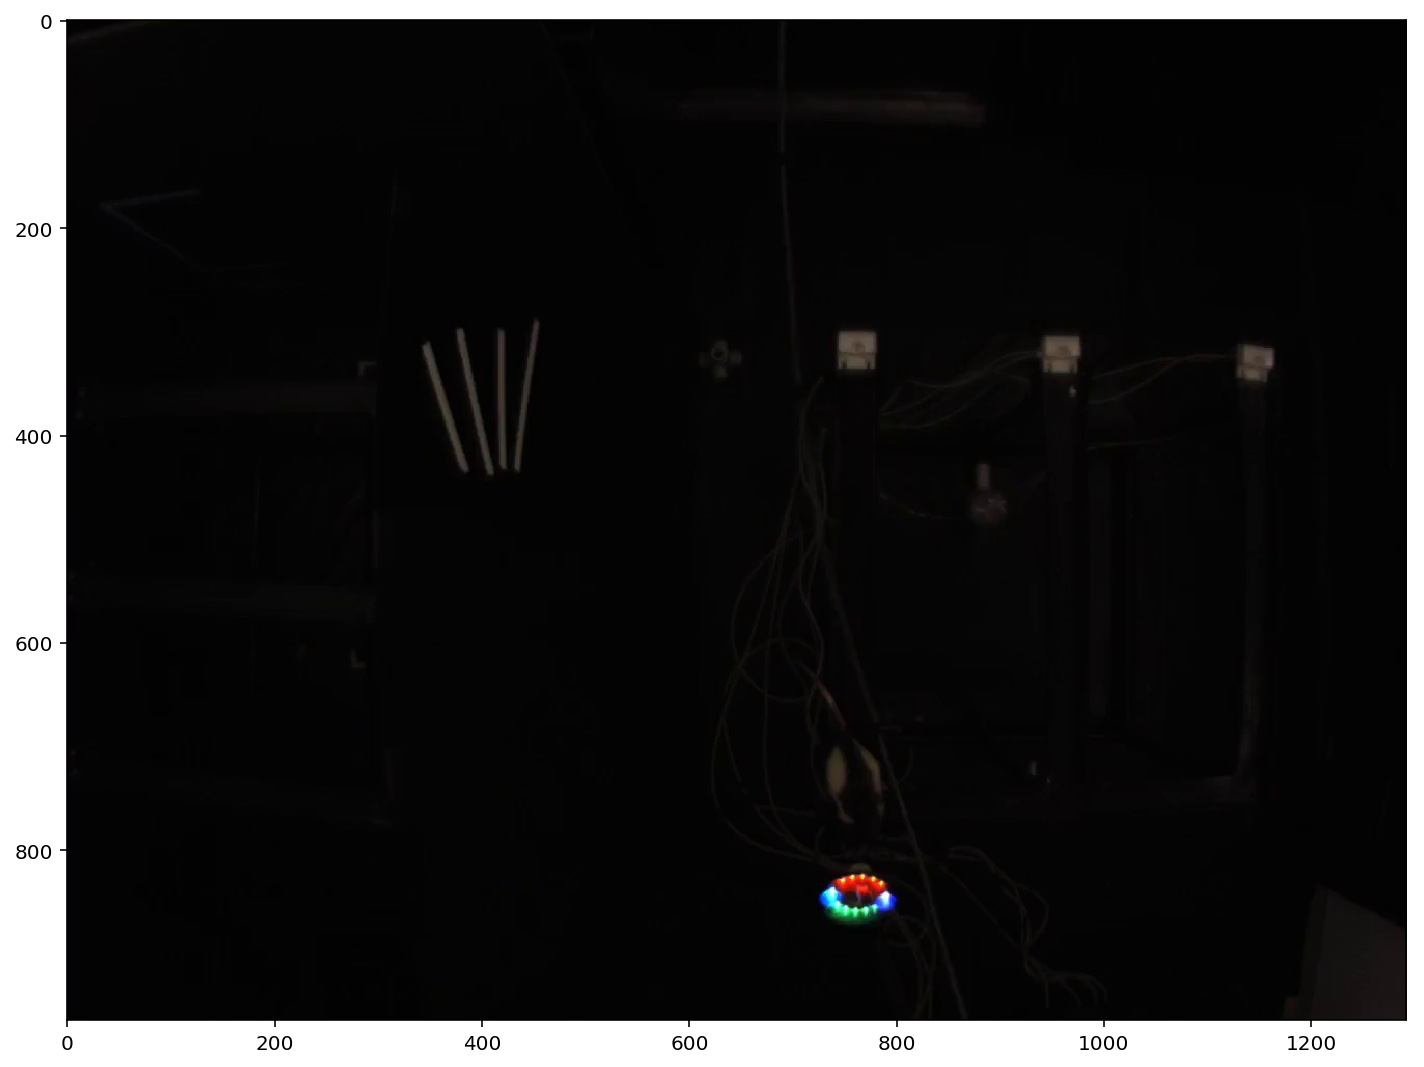

In [5]:
plt.figure(figsize=(12, 12))
plt.imshow(frame);

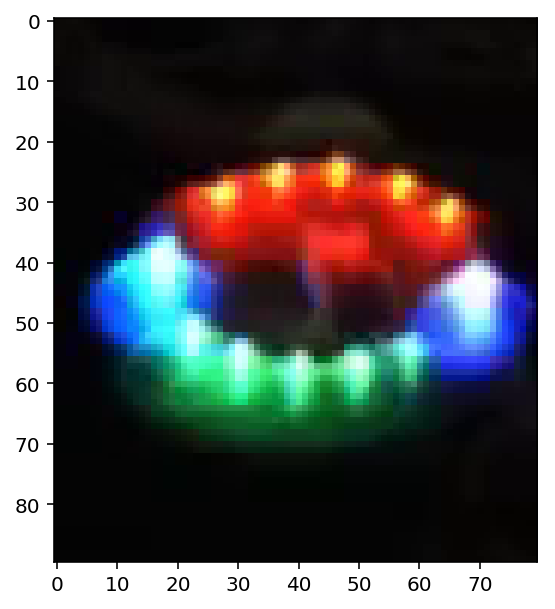

In [6]:
plt.figure(figsize=(5, 5))
plt.imshow(frame[800:890, 720:800]);

### HSV Color from Color Picker of Image (Degree, %, %)

#### Greens
+  Green - (125, 45, 78)
+  Dark Green - (124, 49, 24)
+  Light Green - (175, 28, 99)

#### Reds
+  Red - (5, 80, 66)
+  Light Red - (6, 82, 89)
+  Yellow - (52, 59, 98)

#### Blues
+  Blue - (225, 65, 97)
+  Light Blue - (180, 36, 98)

In [523]:
def convert_hsv(color):
    '''Convert from Image processing HSV to Open CV

    Image Processing Scale
    H: 0-360, S: 0-100 and V: 0-100
    
    OpenCV Scale
    H: 0-180, S: 0-255, V: 0-255
    
    '''
    return (color / np.array([2, 100 / 255, 100 / 255])).astype(np.uint8)


min_green, max_green = np.array([110, 32, 24], dtype=np.uint8), np.array([175, 100, 100], dtype=np.uint8)
min_red, max_red = np.array([4, 59, 66], dtype=np.uint8), np.array([57, 100, 100], dtype=np.uint8)
min_blue, max_blue = np.array([165, 35, 60], dtype=np.uint8), np.array([239, 100, 100], dtype=np.uint8)

min_all, max_all = np.array([4, 32, 40], dtype=np.uint8), np.array([226, 100, 100], dtype=np.uint8)

In [426]:
def plot_color_detection(frame, min_color, max_color, figsize=(12, 12),
                         blur_kernel=(15, 15), morph_kernel=(5, 5)):
    plt.figure(figsize=figsize)
    frame_ = frame.copy()
    plt.subplot(321)
    plt.imshow(frame_)
    
    frame_ = cv2.GaussianBlur(frame_, blur_kernel, 0)
    plt.subplot(322)
    plt.imshow(frame_)

    frame_ = cv2.cvtColor(frame_, cv2.COLOR_RGB2HSV)
    frame_ = cv2.inRange(frame_, min_color, max_color)
    
    plt.subplot(323)
    plt.imshow(frame_)
    
    KERNEL = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, morph_kernel)
    frame_ = cv2.morphologyEx(frame_, cv2.MORPH_CLOSE, KERNEL)

    plt.subplot(324)
    plt.imshow(frame_)

    frame_ = cv2.morphologyEx(frame_, cv2.MORPH_OPEN, KERNEL)

    plt.subplot(325)
    plt.imshow(frame_)

    moments = cv2.moments(frame_)
    centroid = (
        int(moments['m10'] / moments['m00']),
        int(moments['m01'] / moments['m00'])
    )
    f = frame.copy()
    RGB_GREEN = (0, 255, 0)
    cv2.circle(f, centroid, 5, RGB_GREEN, -1, cv2.CV_8U)

    plt.subplot(326)
    plt.imshow(f);
    plt.tight_layout()

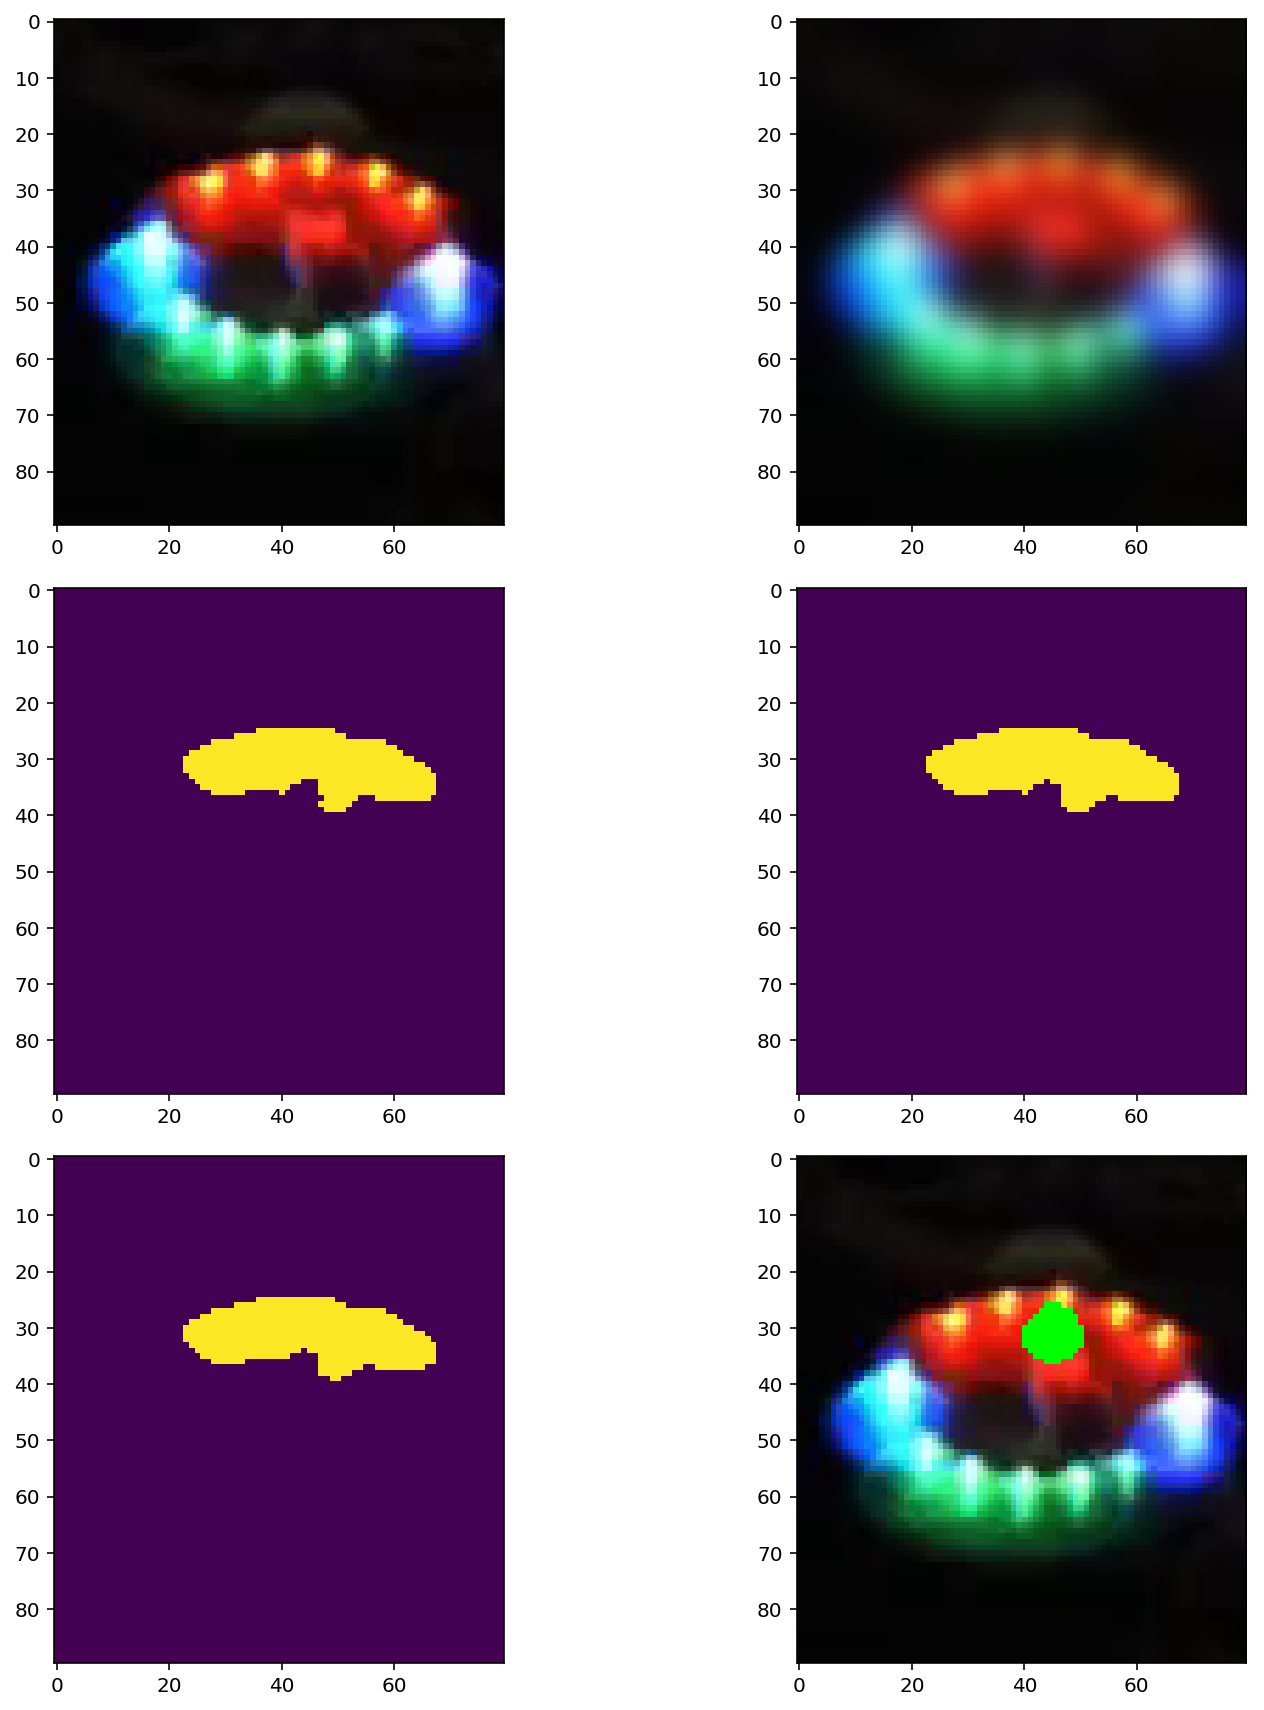

In [349]:
plot_color_detection(frame[800:890, 720:800], convert_hsv(min_red), convert_hsv(max_red))

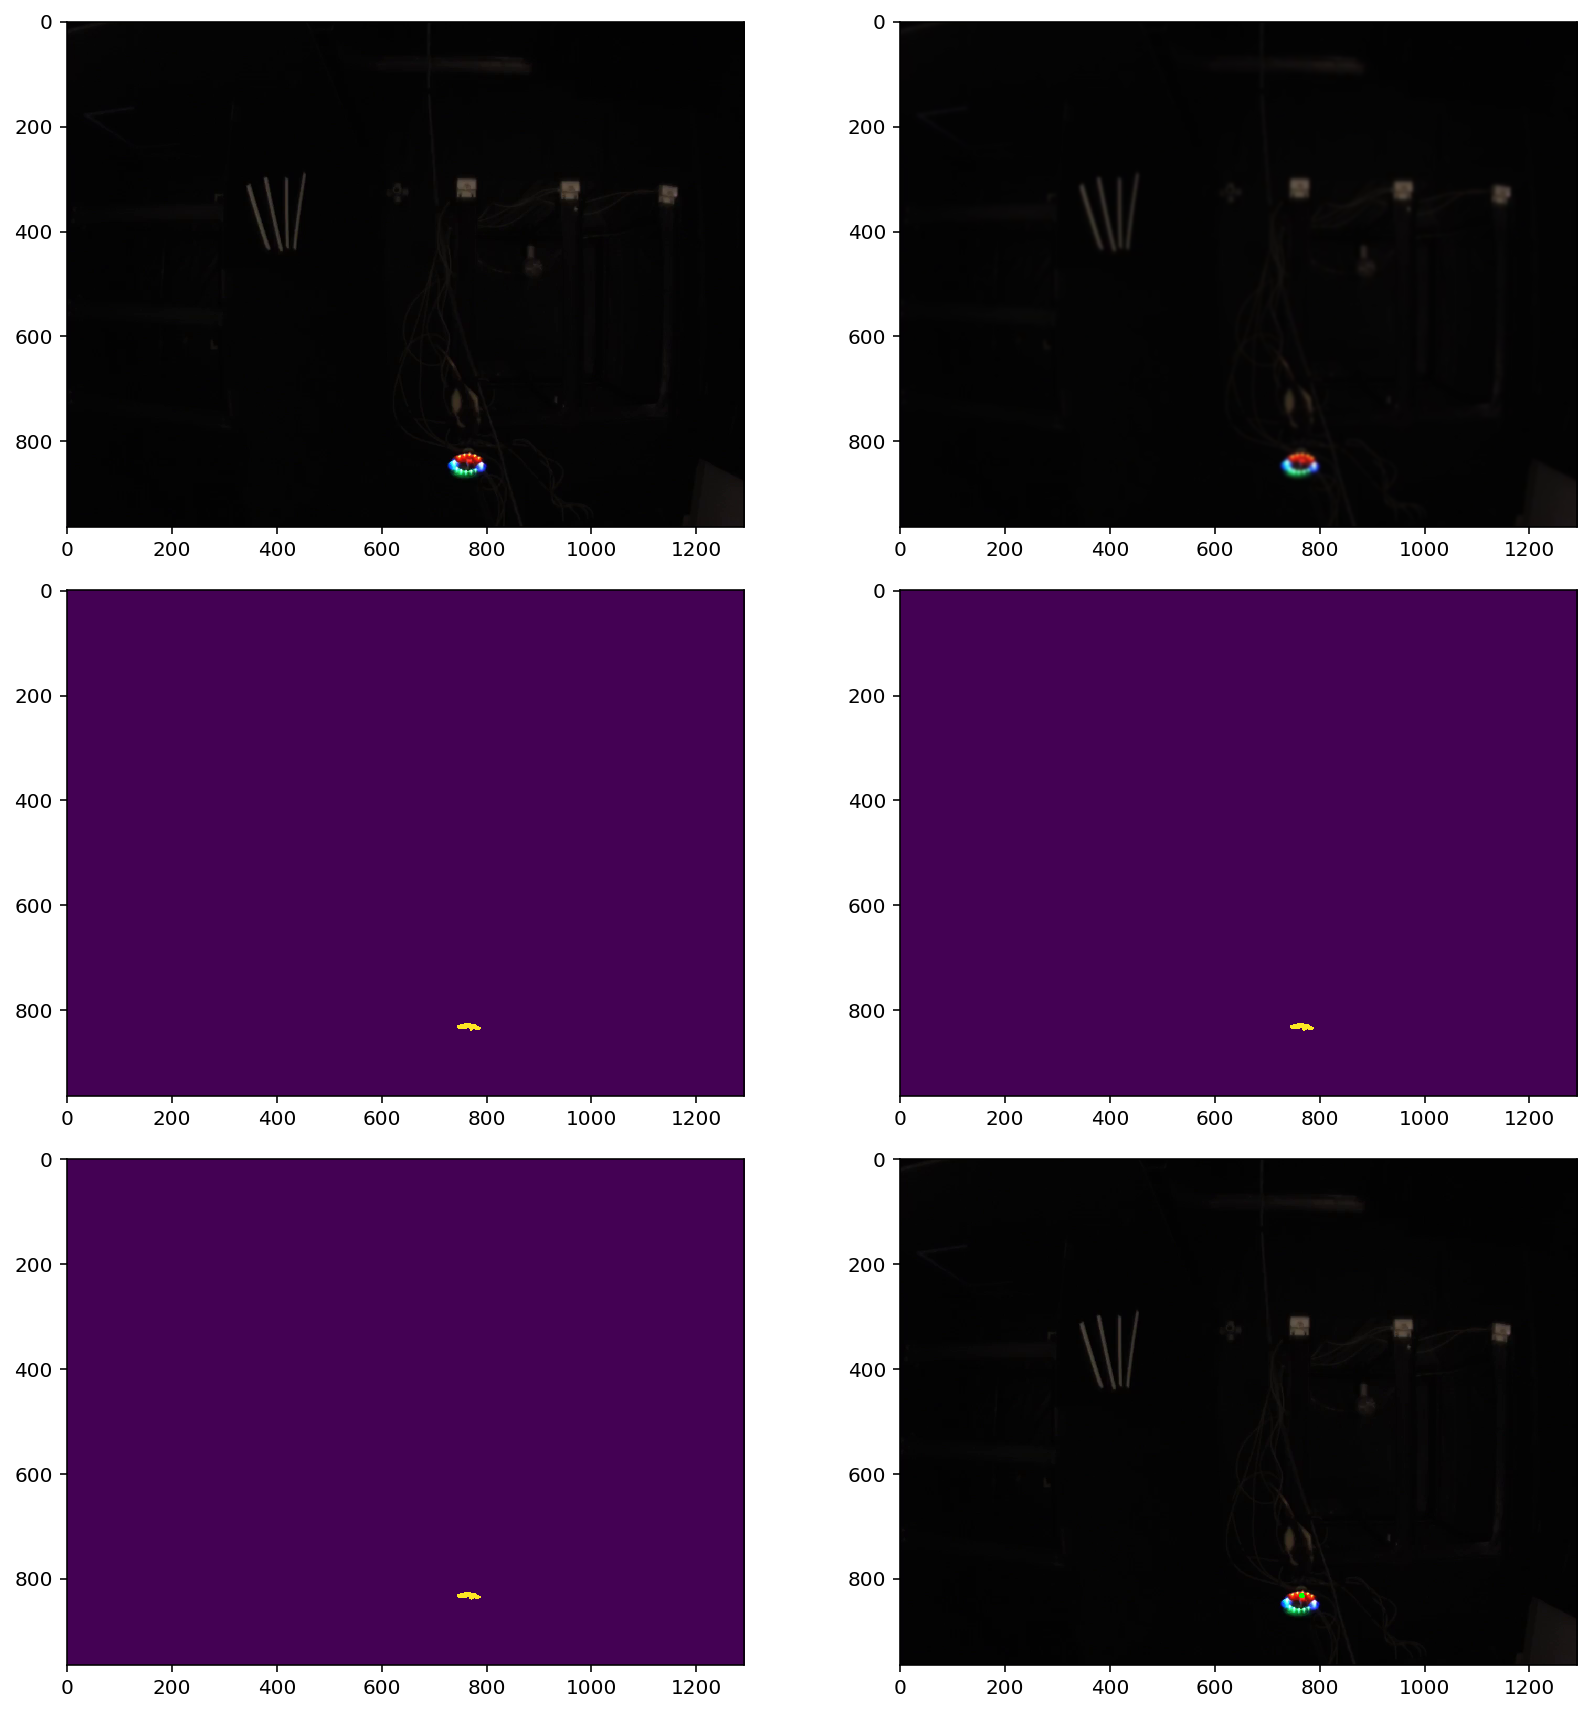

In [350]:
plot_color_detection(frame, convert_hsv(min_red), convert_hsv(max_red))

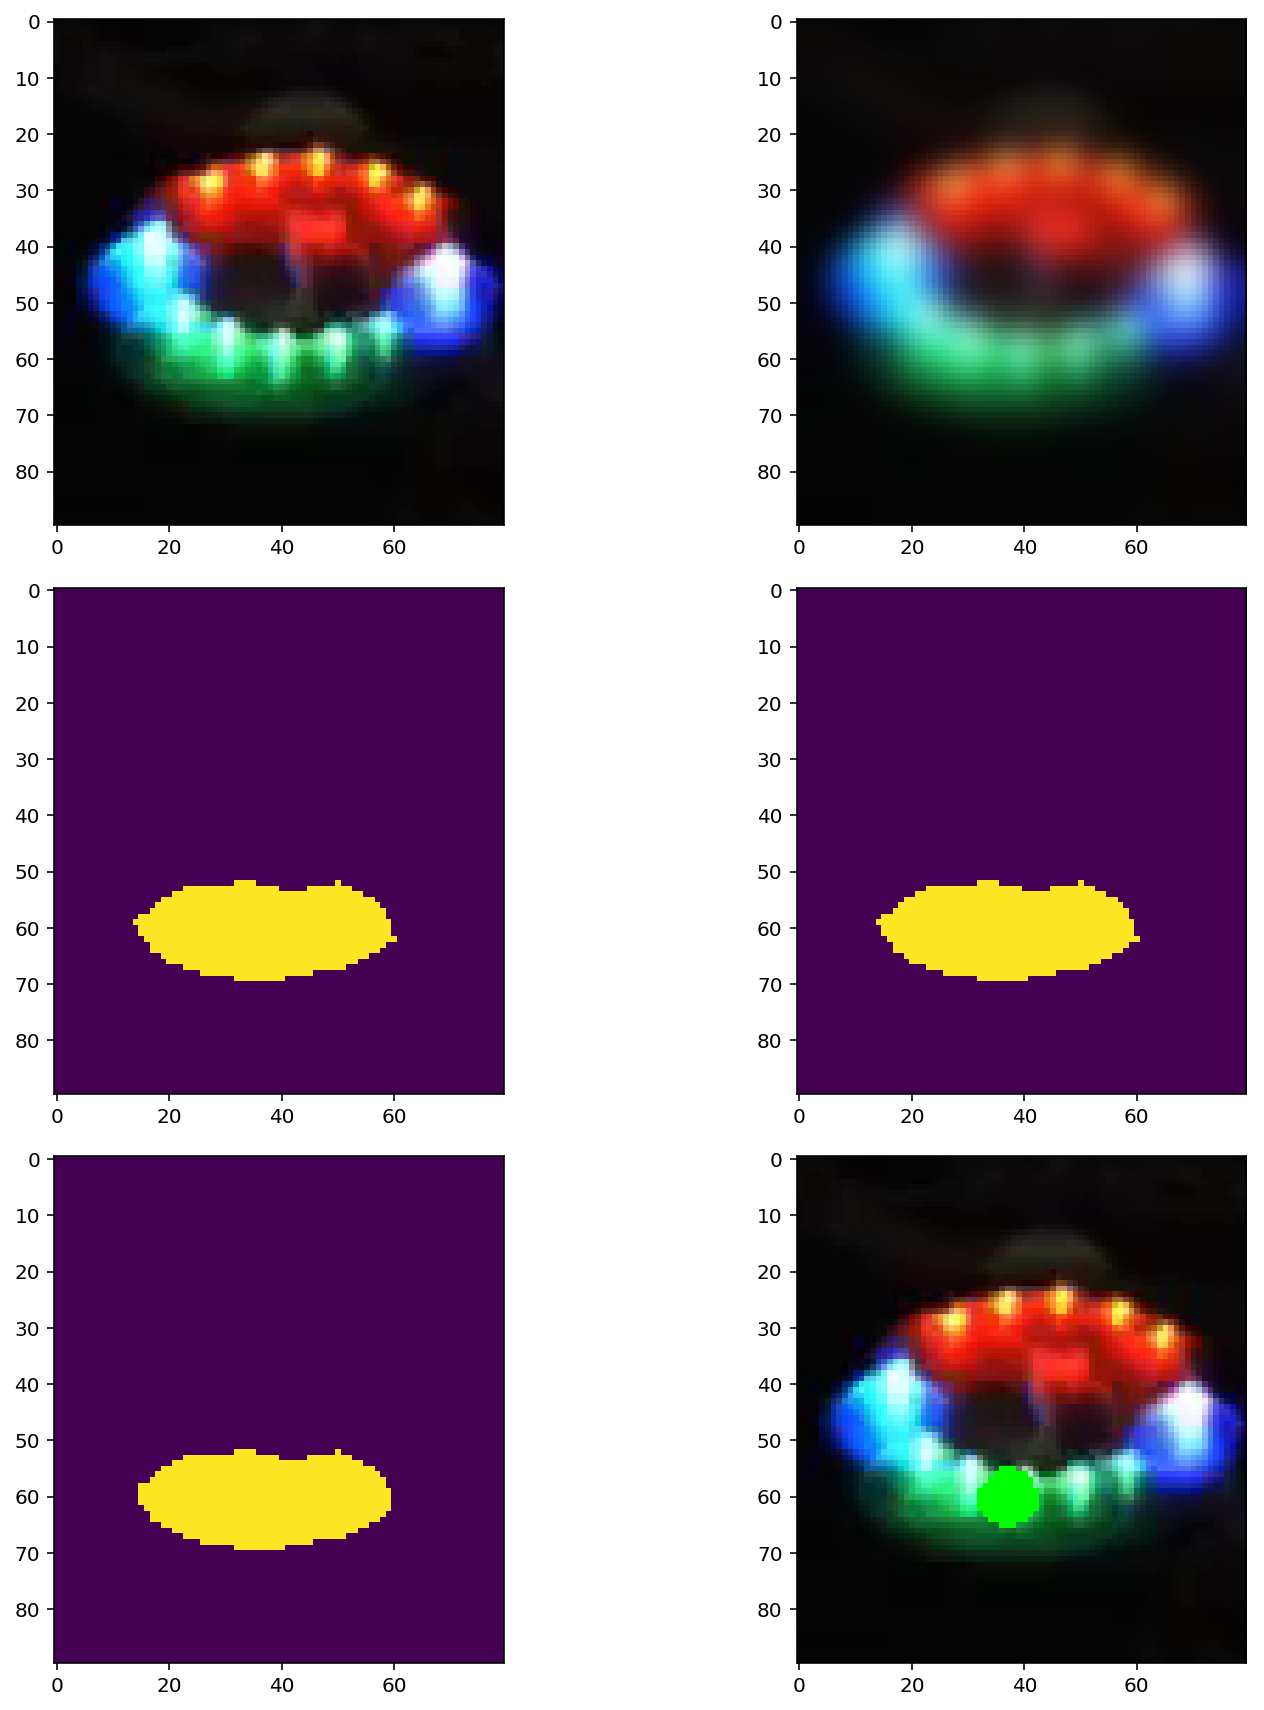

In [351]:
plot_color_detection(frame[800:890, 720:800], convert_hsv(min_green), convert_hsv(max_green))

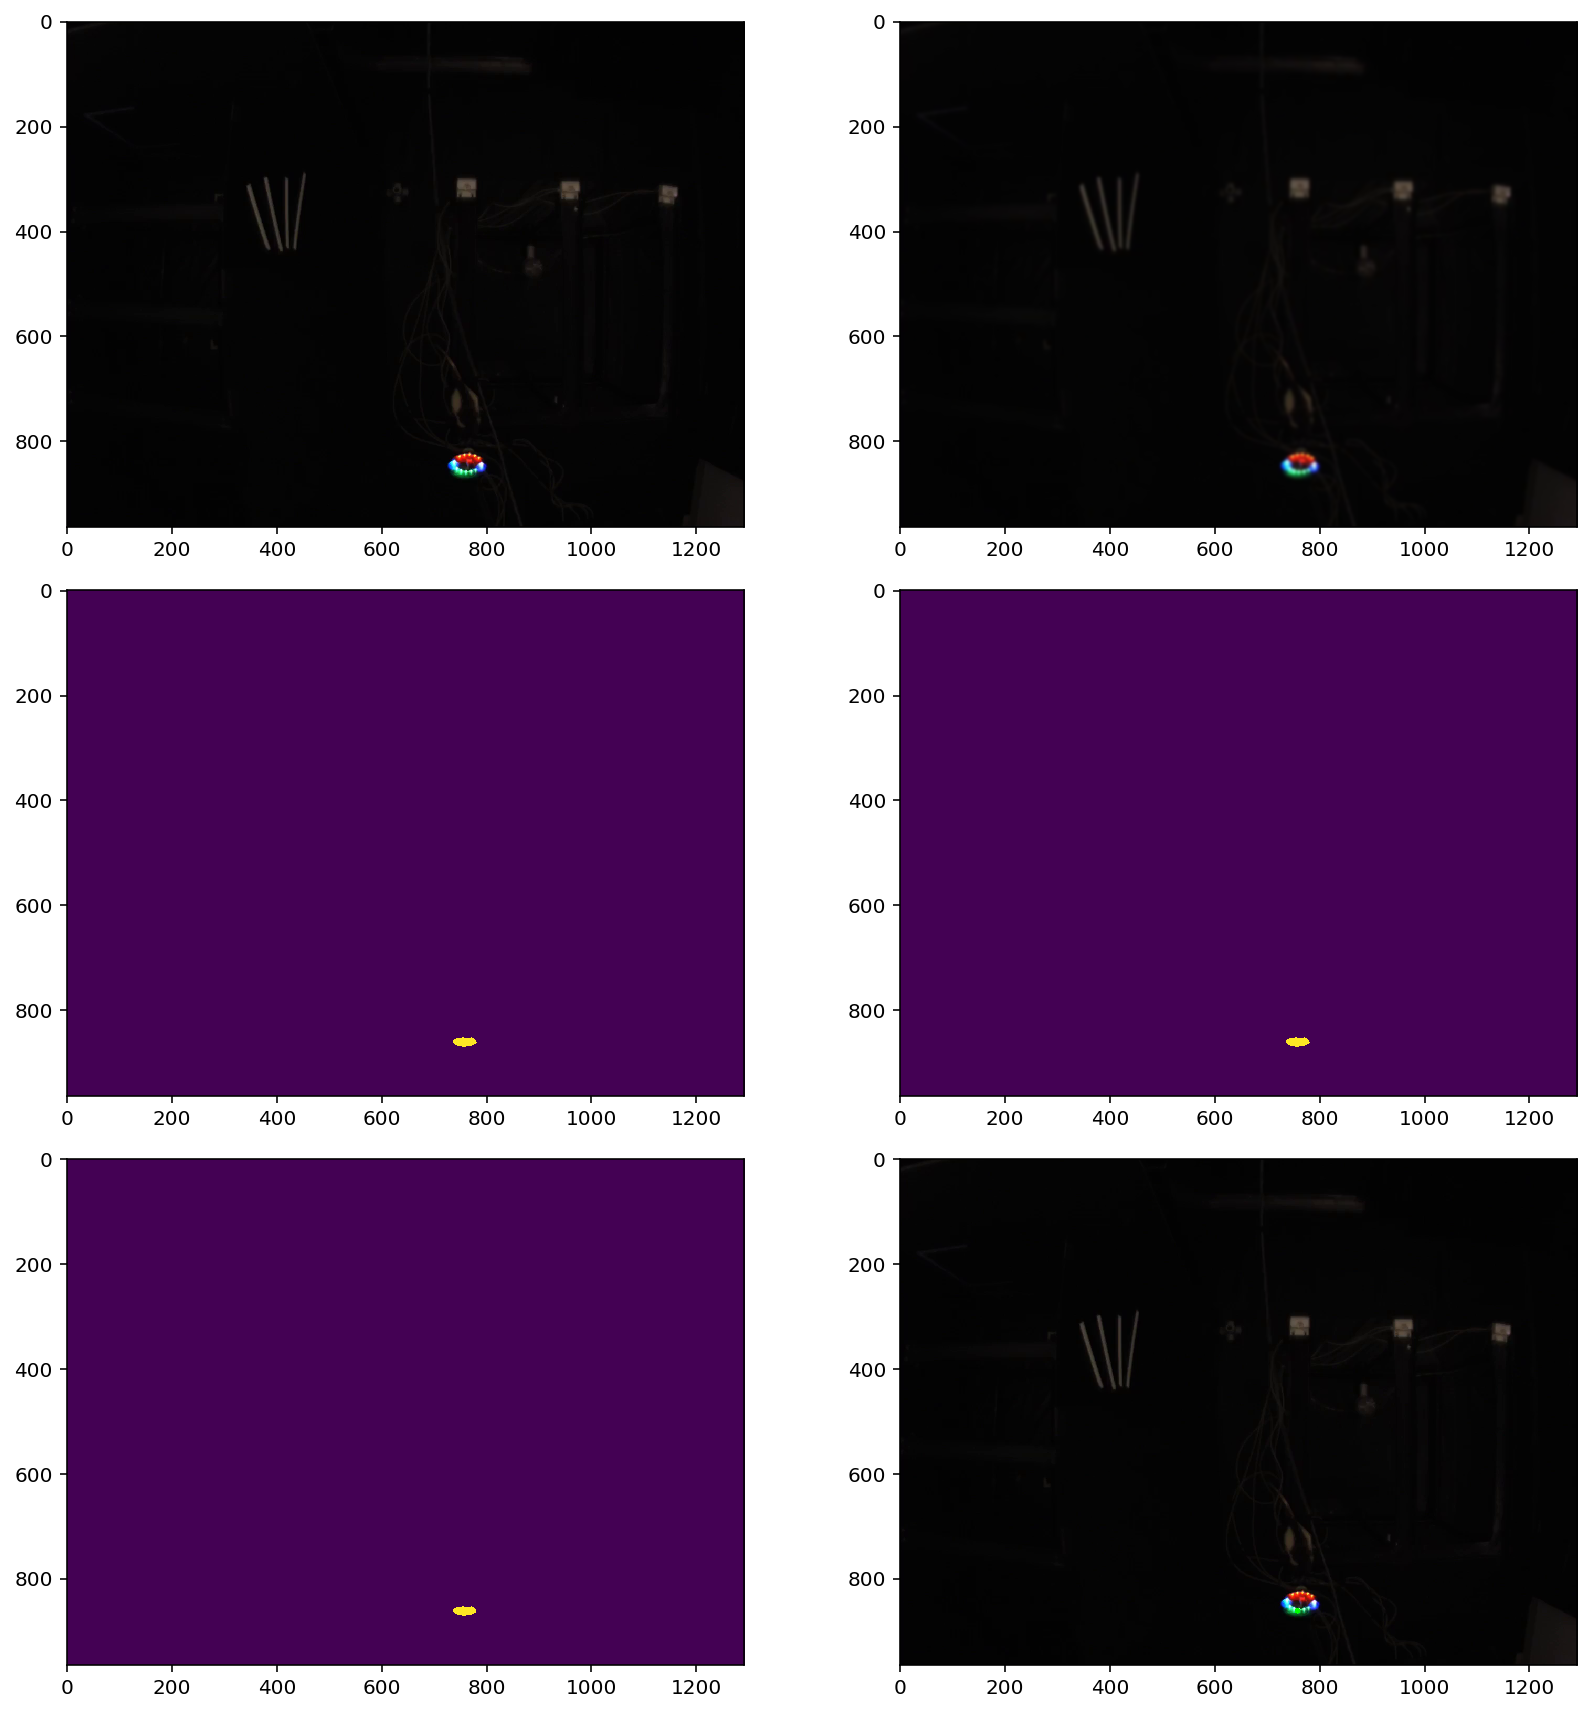

In [352]:
plot_color_detection(frame, convert_hsv(min_green), convert_hsv(max_green))

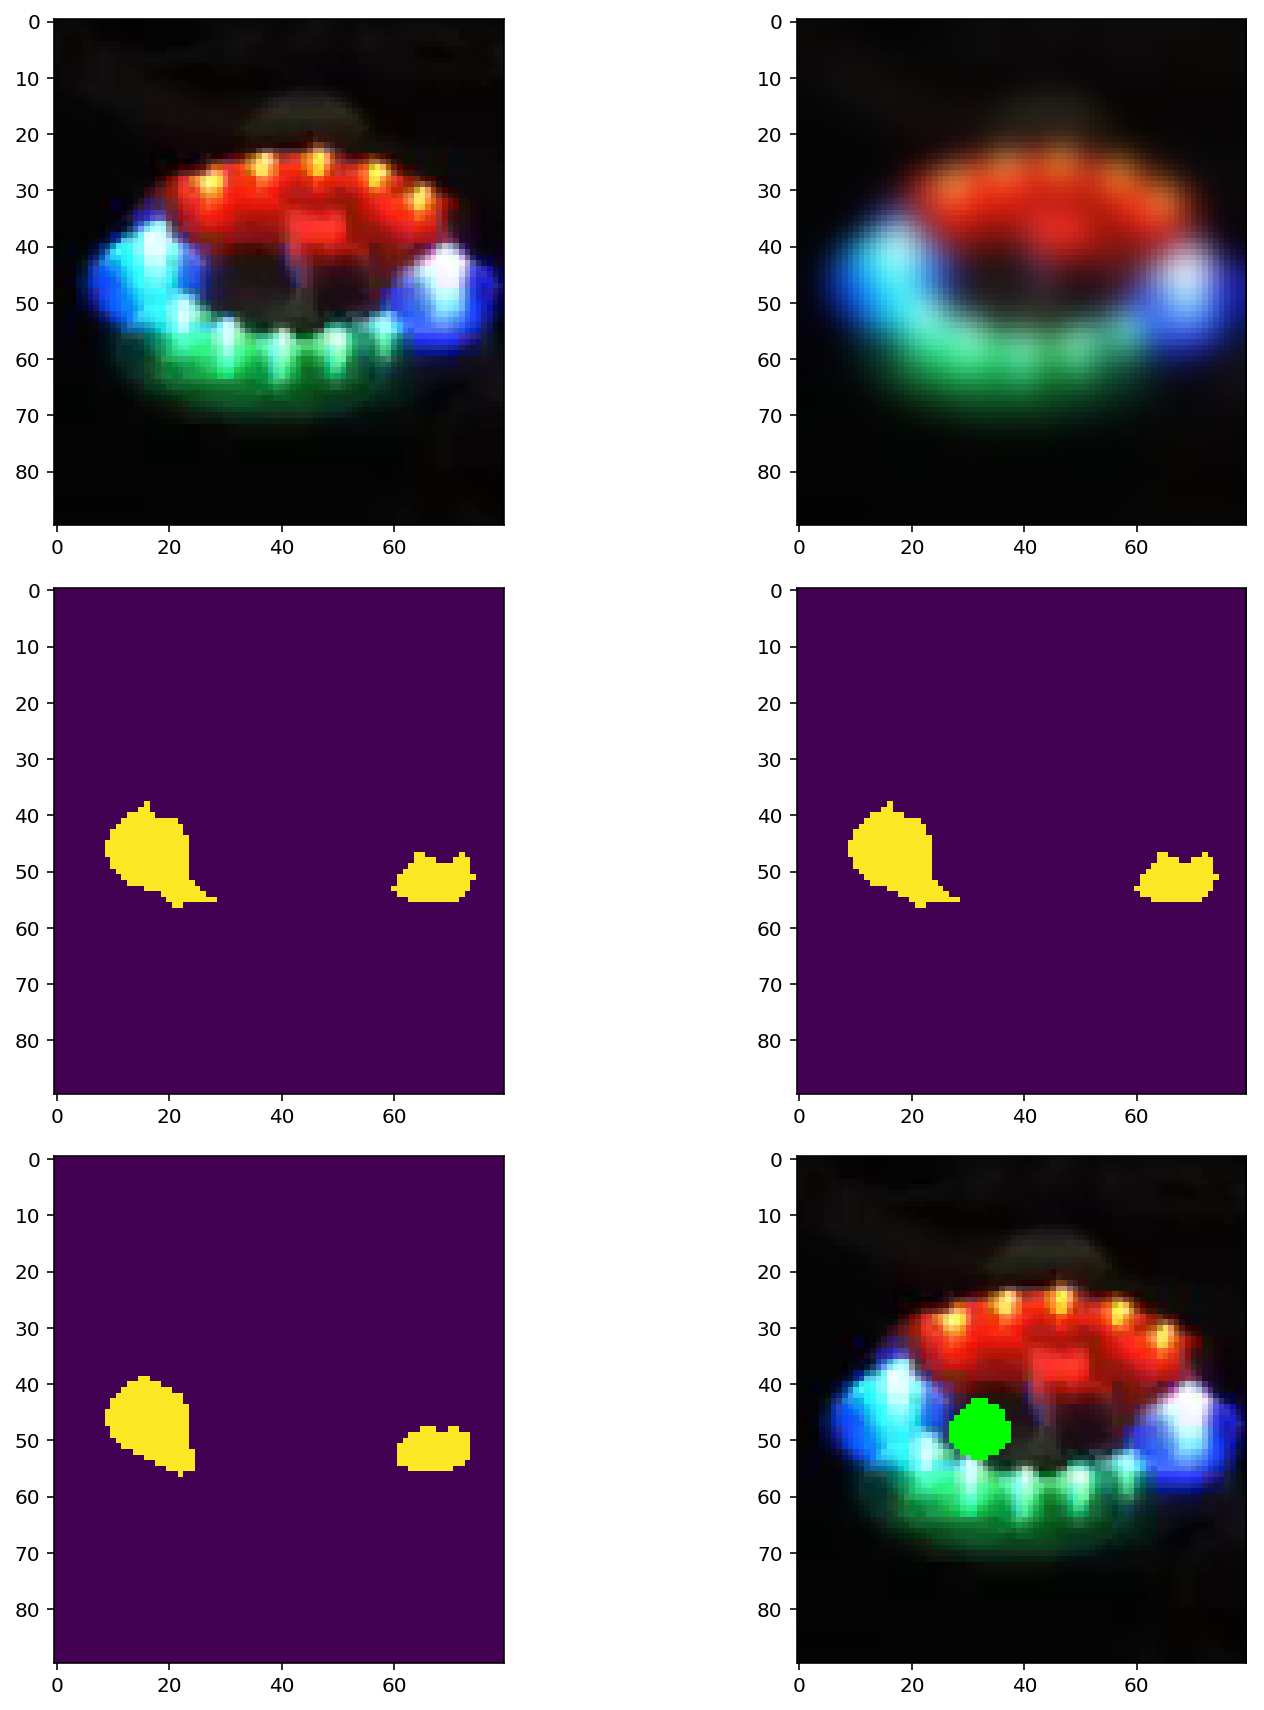

In [353]:
plot_color_detection(frame[800:890, 720:800], convert_hsv(min_blue), convert_hsv(max_blue))

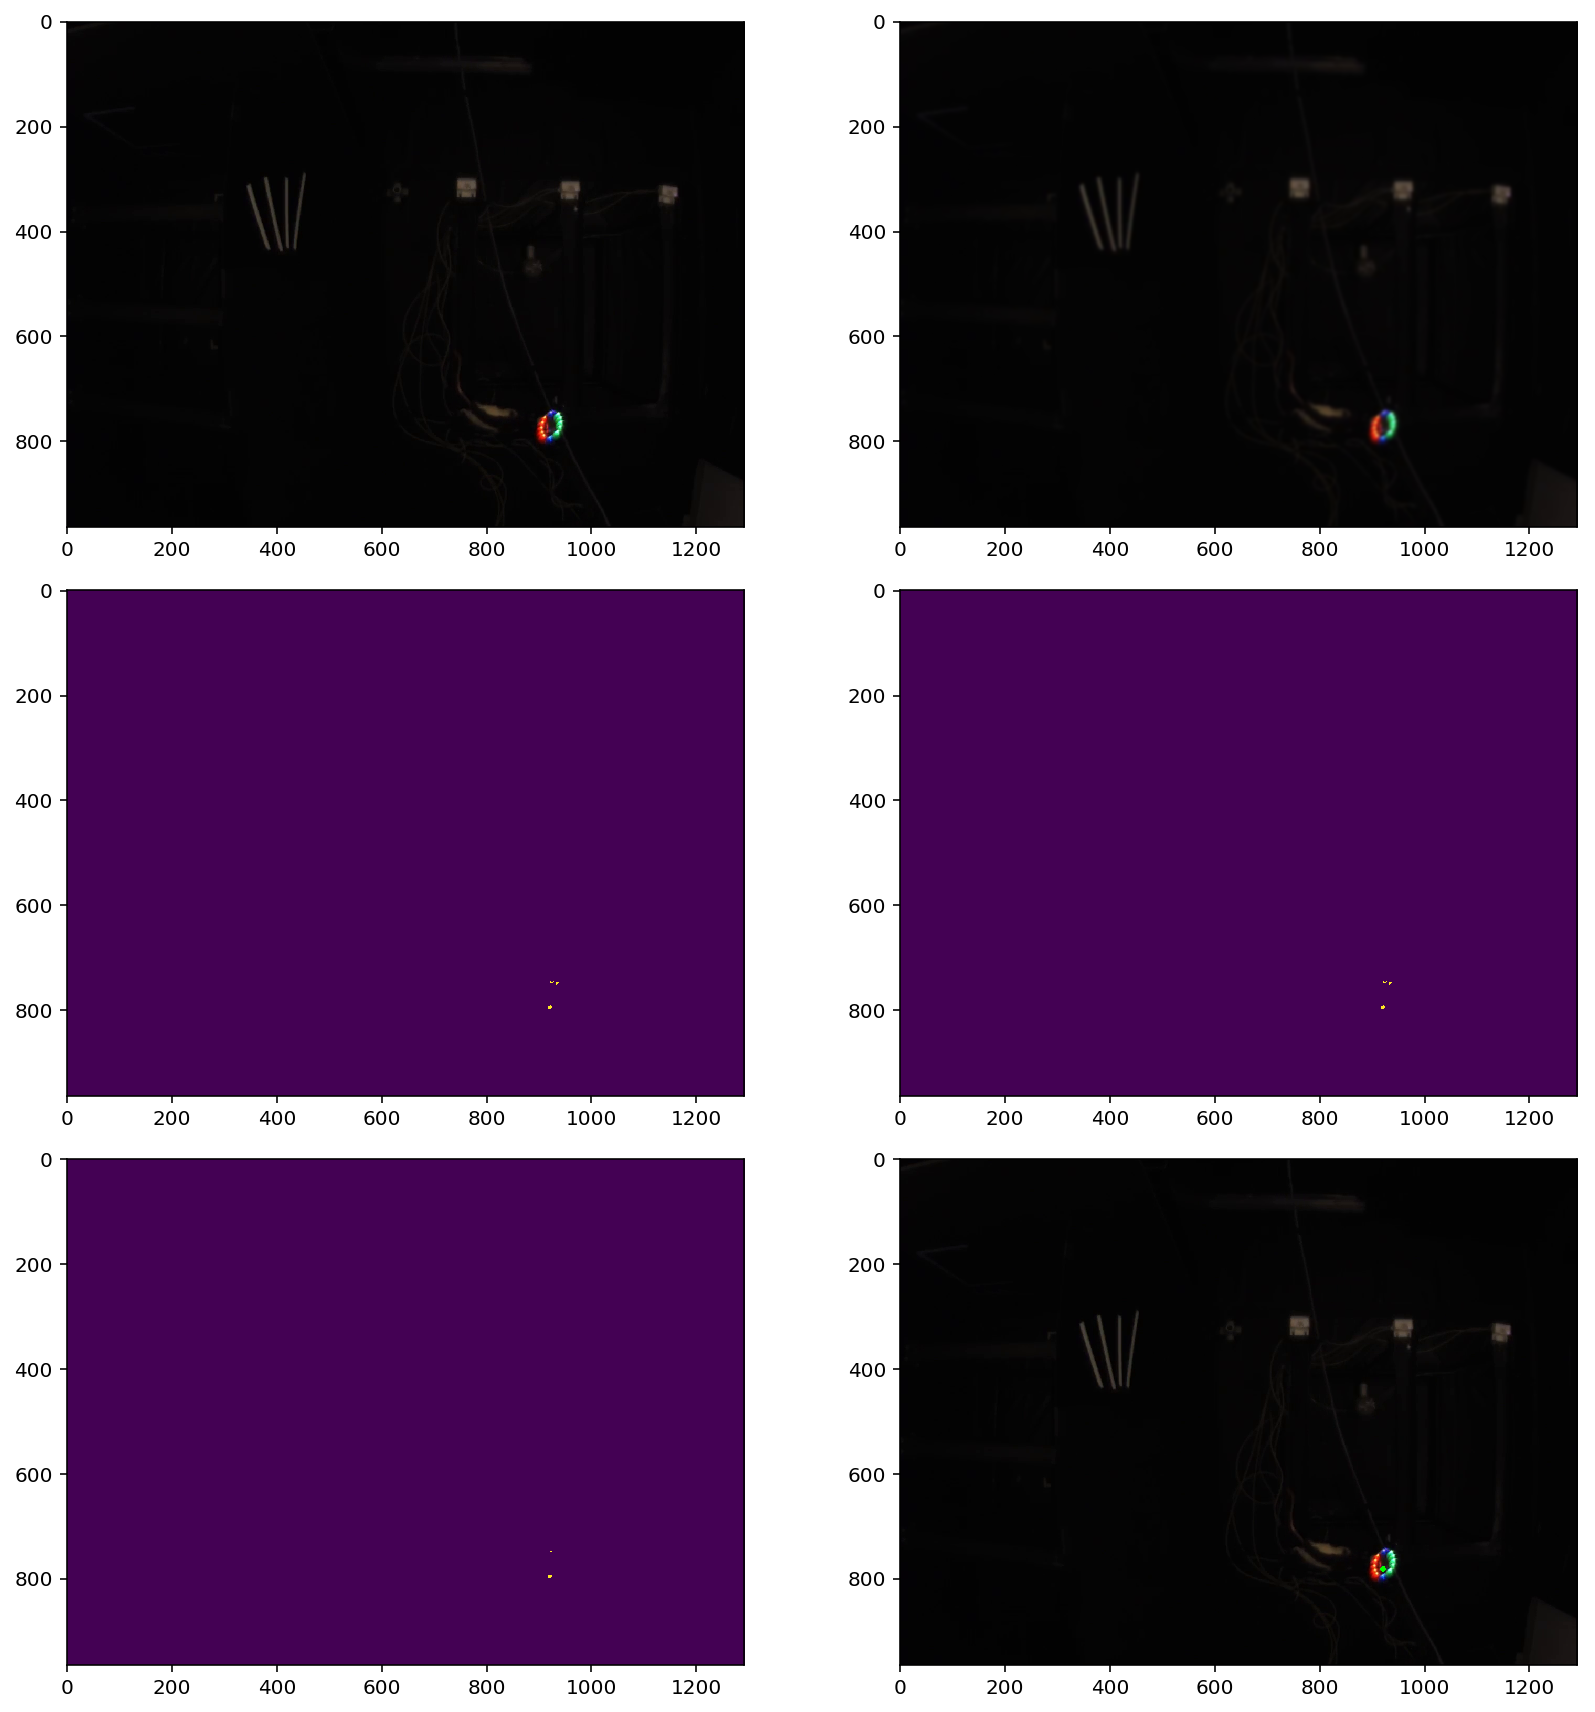

In [524]:
plot_color_detection(frame, convert_hsv(min_blue), convert_hsv(max_blue))

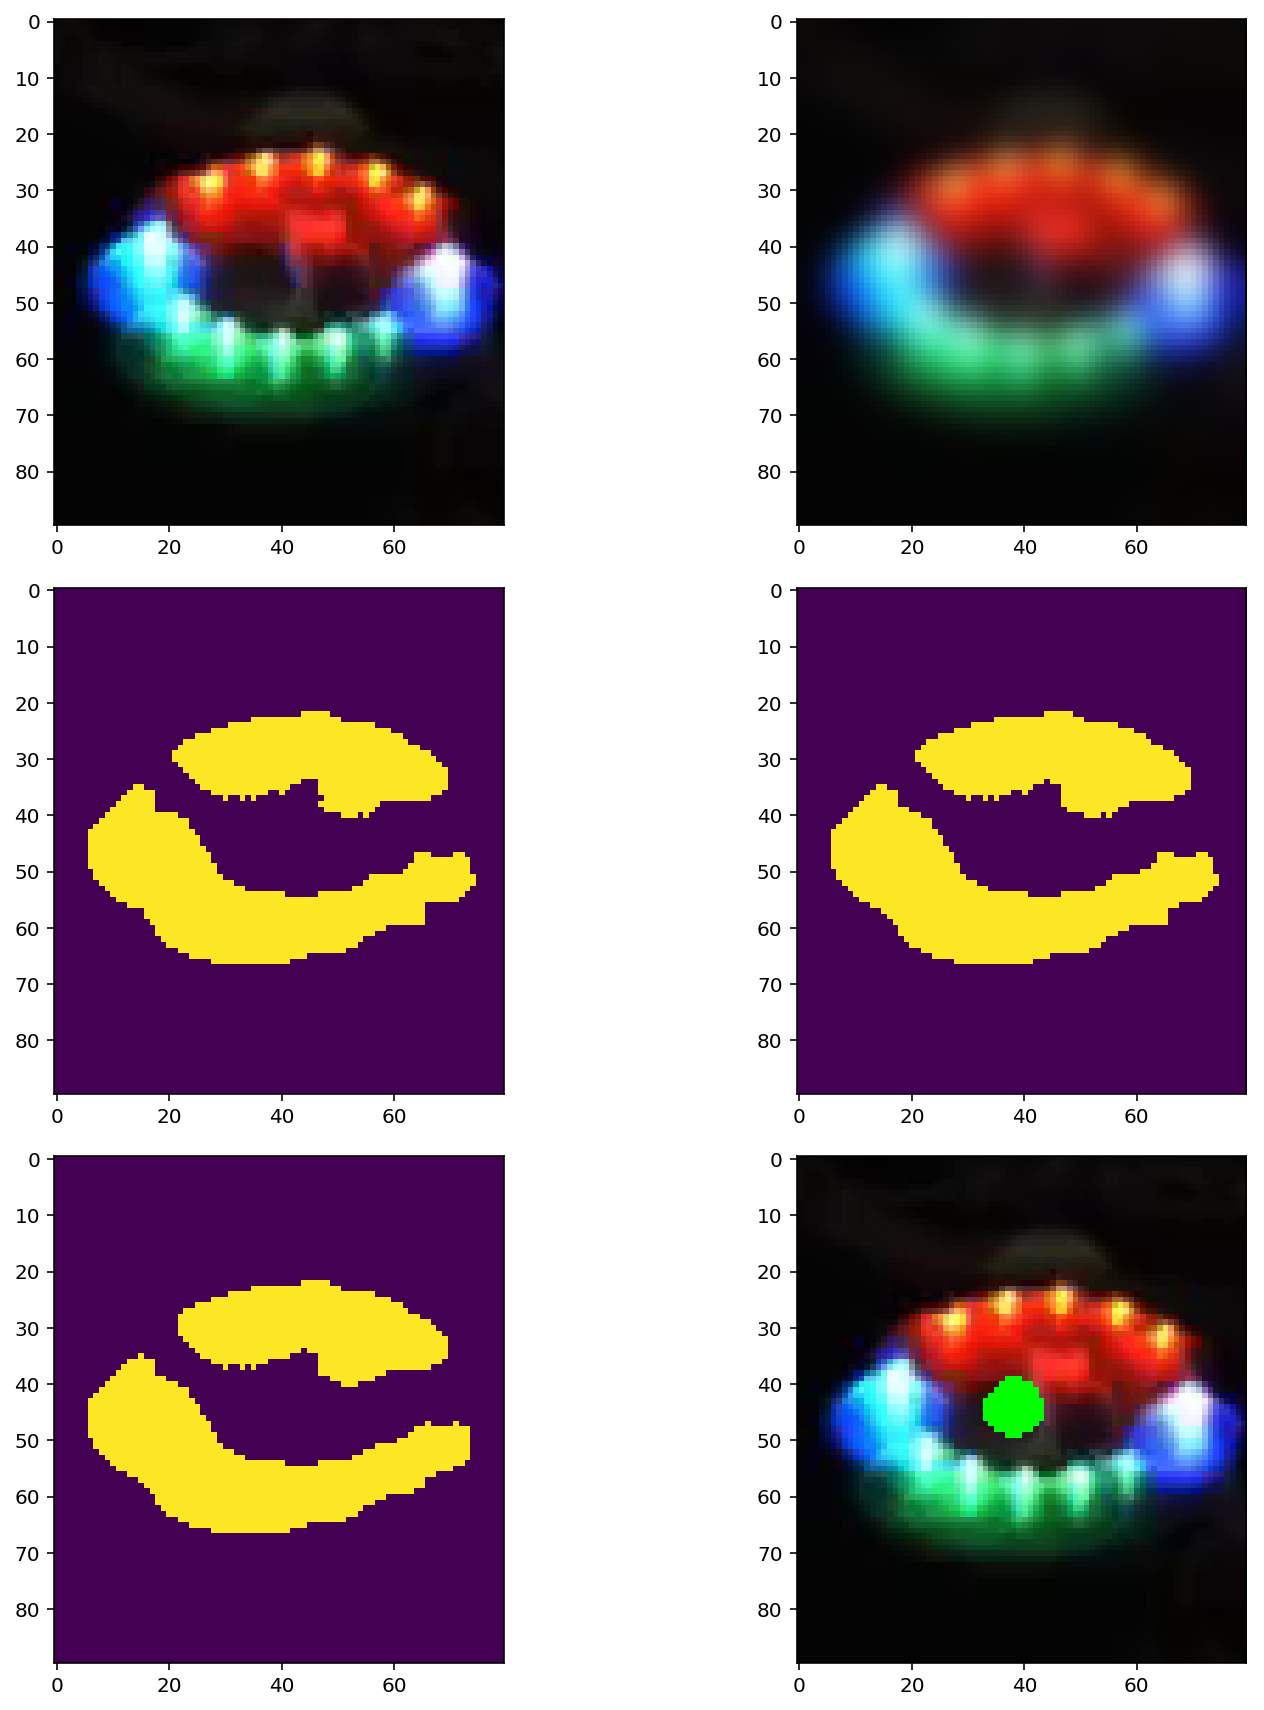

In [355]:
plot_color_detection(frame[800:890, 720:800], convert_hsv(min_all), convert_hsv(max_all))

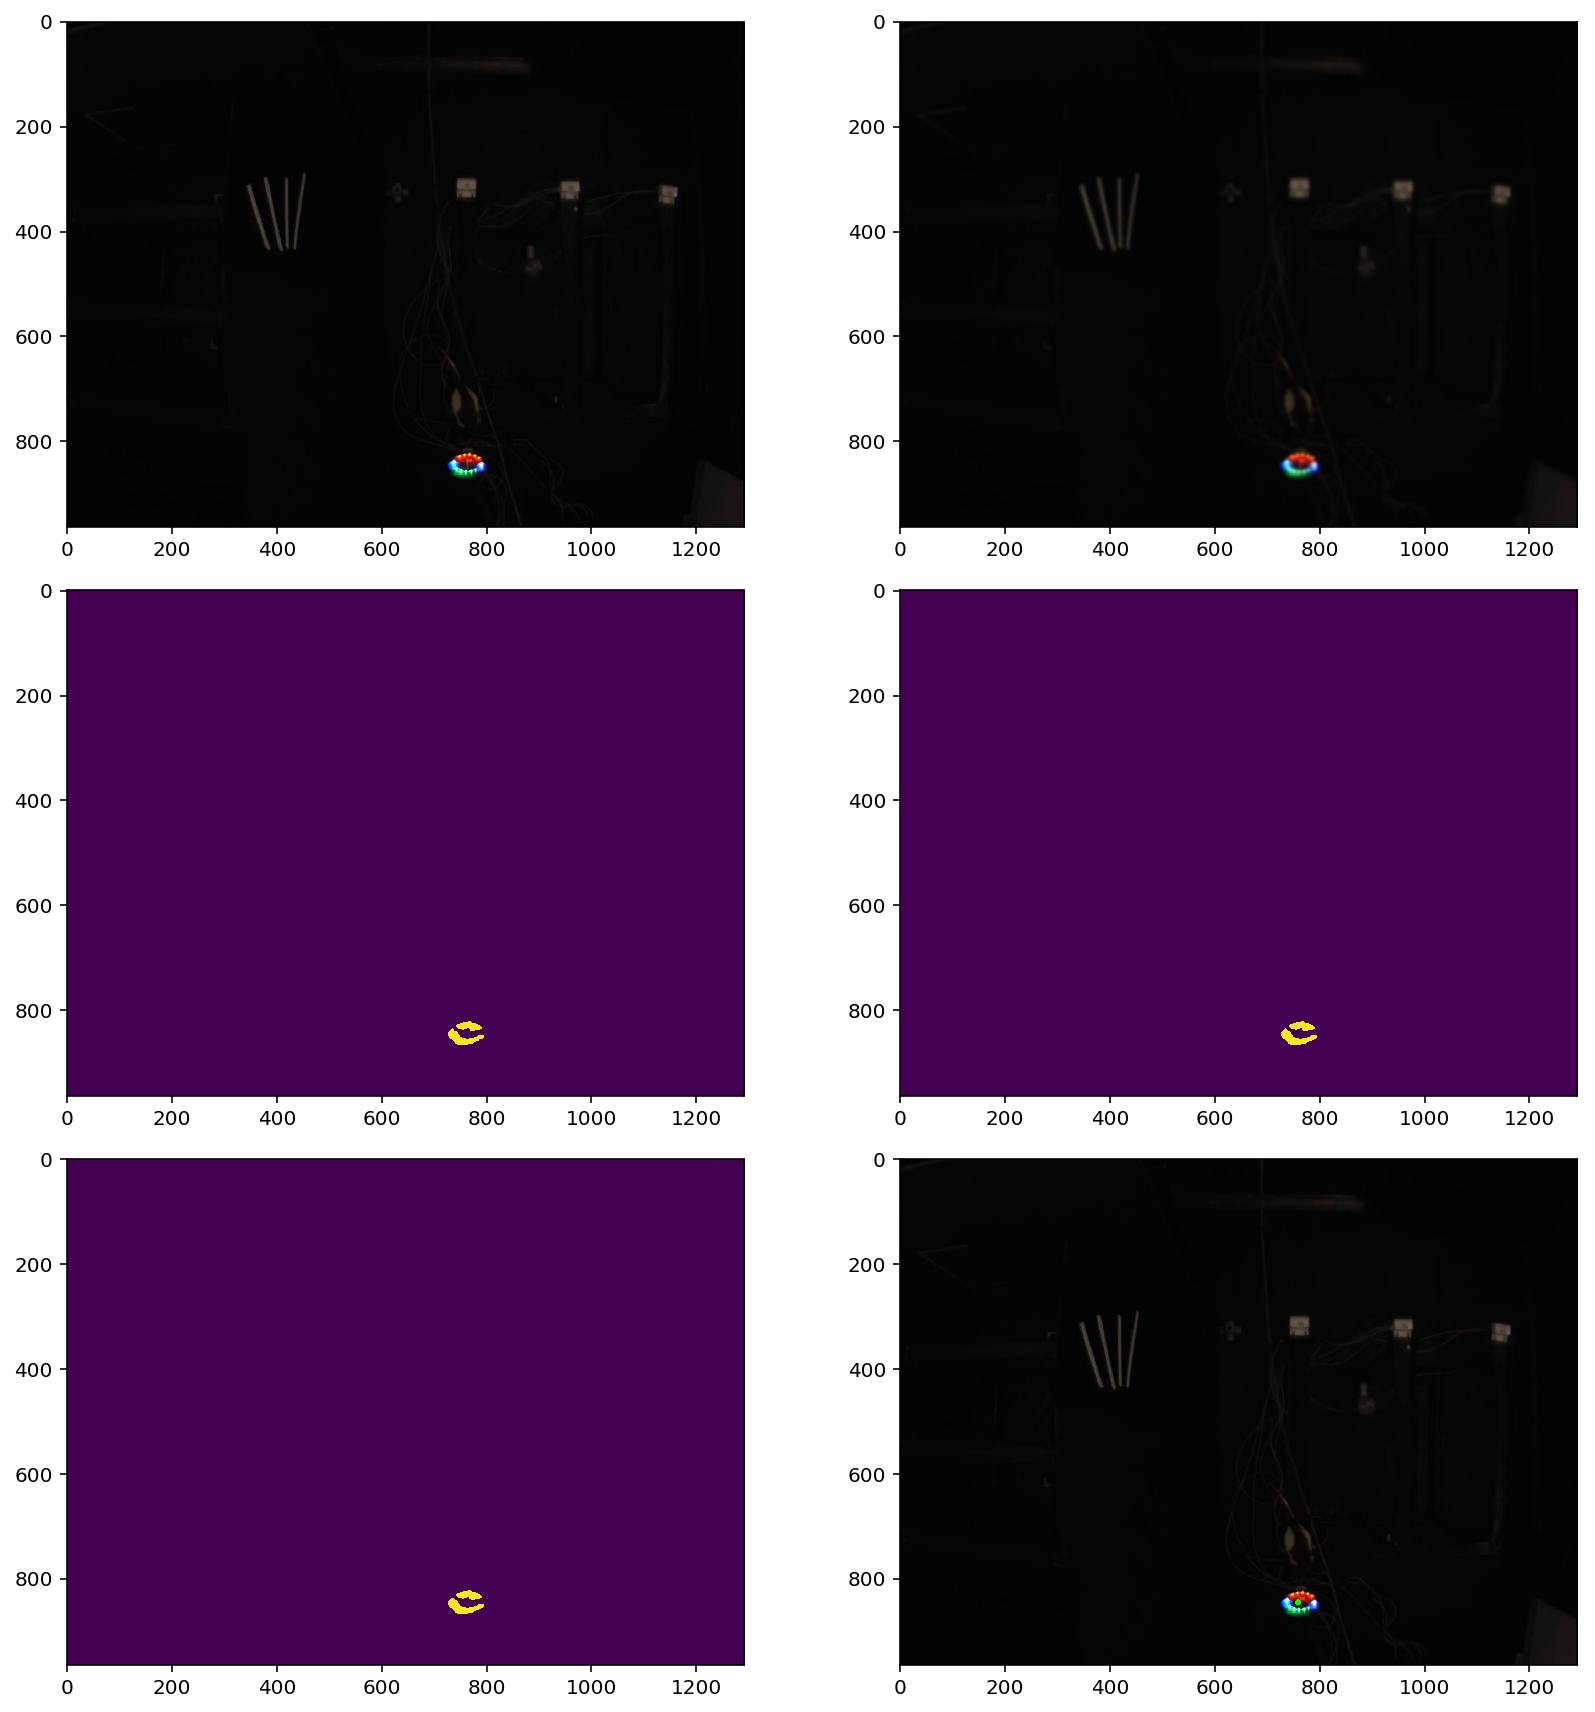

In [356]:
plot_color_detection(frame, convert_hsv(min_all), convert_hsv(max_all))

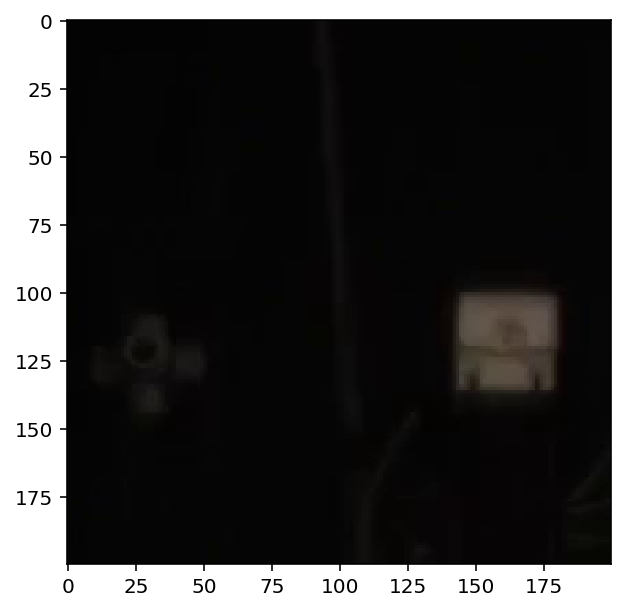

In [164]:
plt.figure(figsize=(5, 5))
plt.imshow(frame[200:400, 600:800])

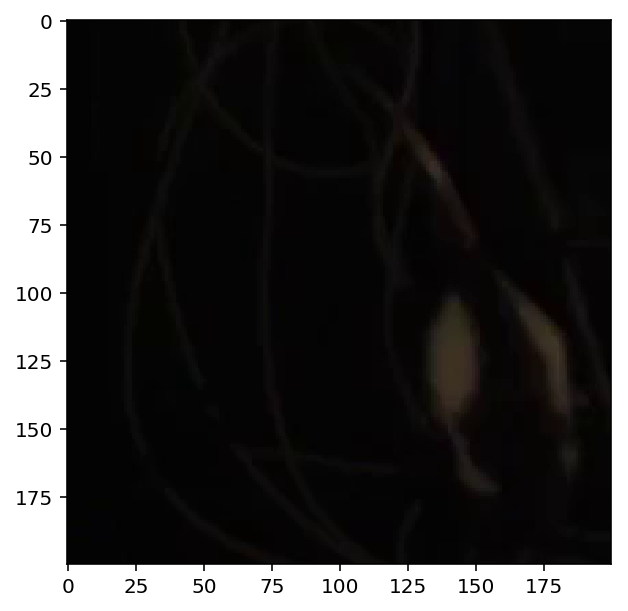

In [165]:
plt.figure(figsize=(5, 5))
plt.imshow(frame[600:800, 600:800])

39, 39, 23
20, 24, 20


In [437]:
min_body, max_body = np.array([0, 38, 10], dtype=np.uint8), np.array([70, 60, 50], dtype=np.uint8)

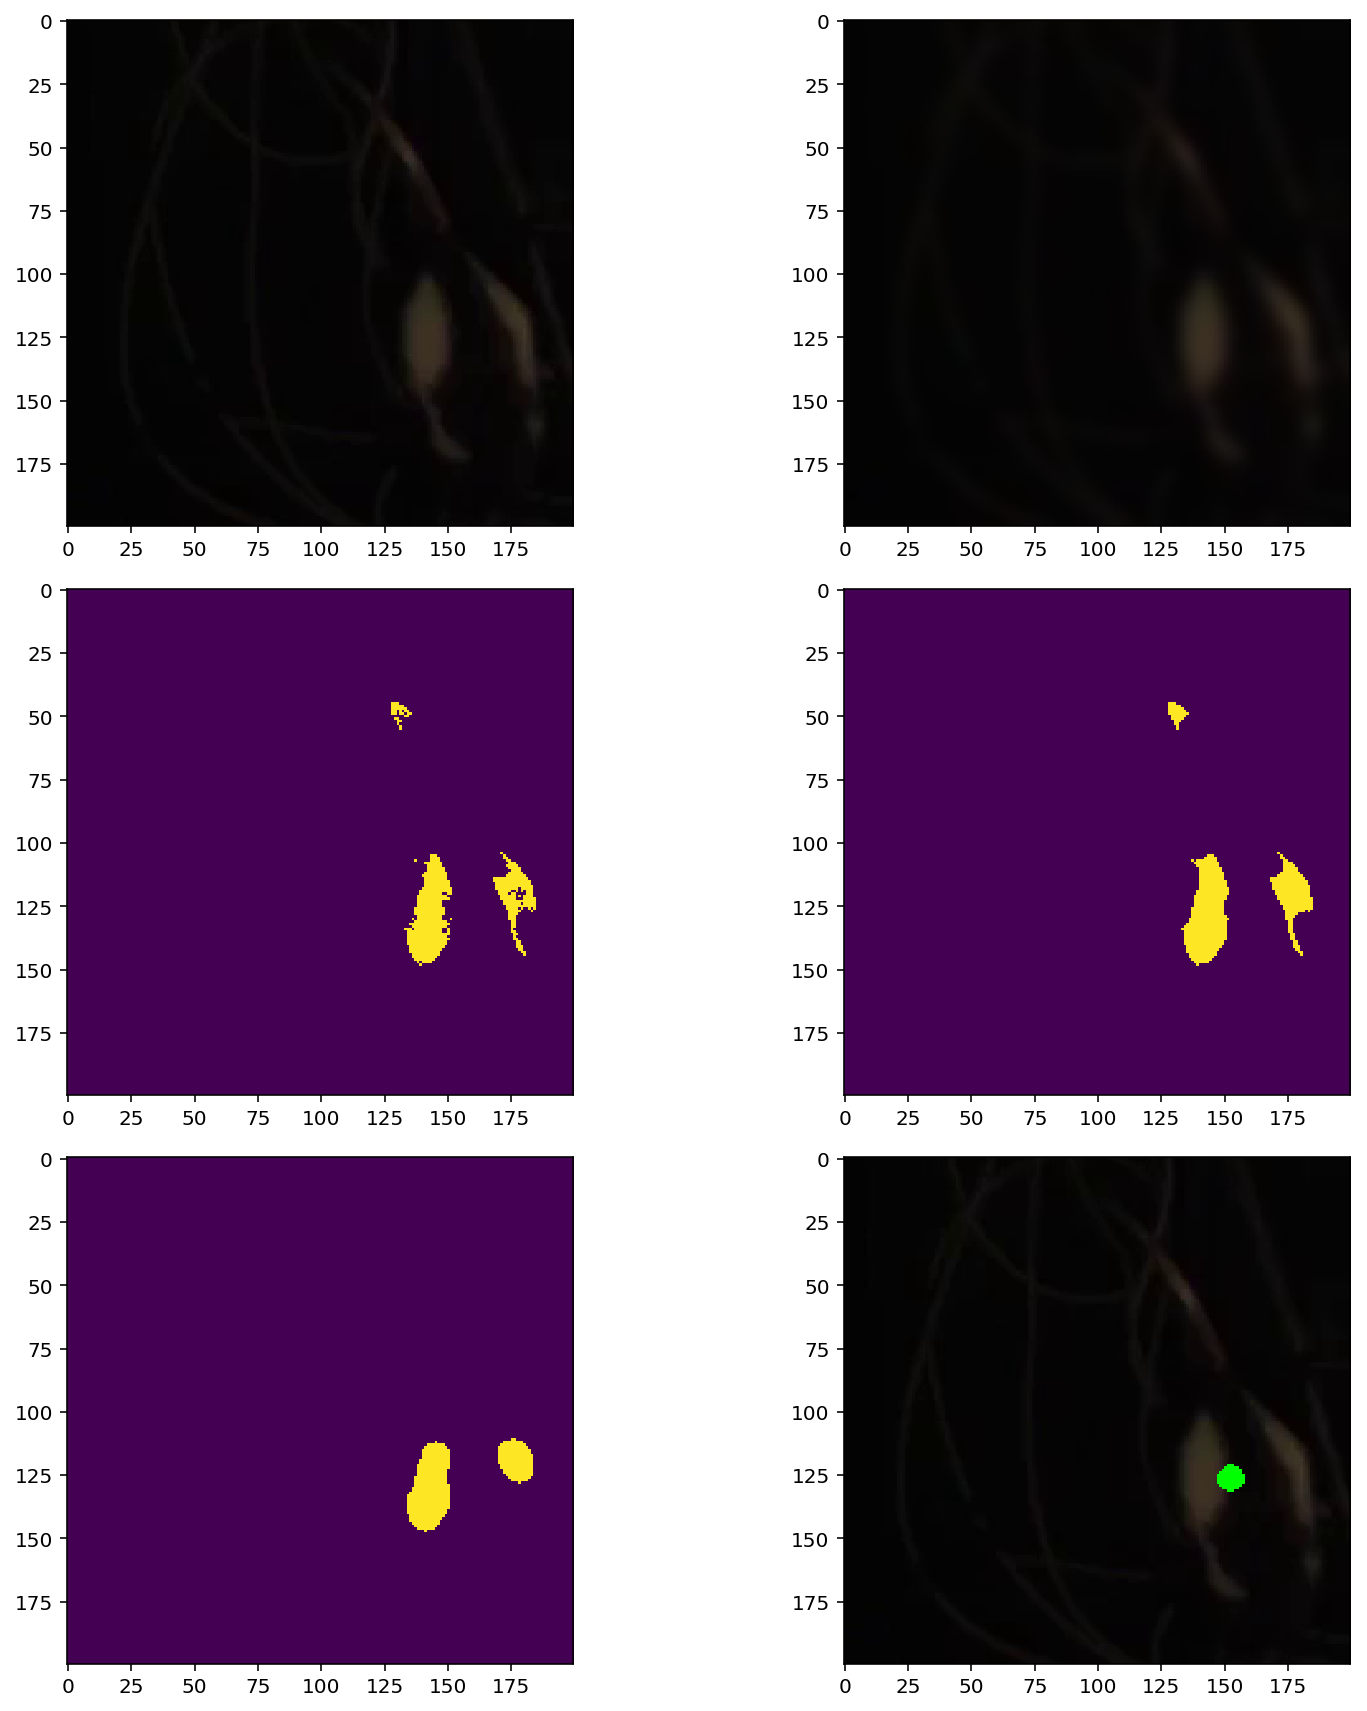

In [458]:
plot_color_detection(frame[600:800, 600:800], convert_hsv(min_body), convert_hsv(max_body),
                     blur_kernel=(15, 15), morph_kernel=(11, 11))

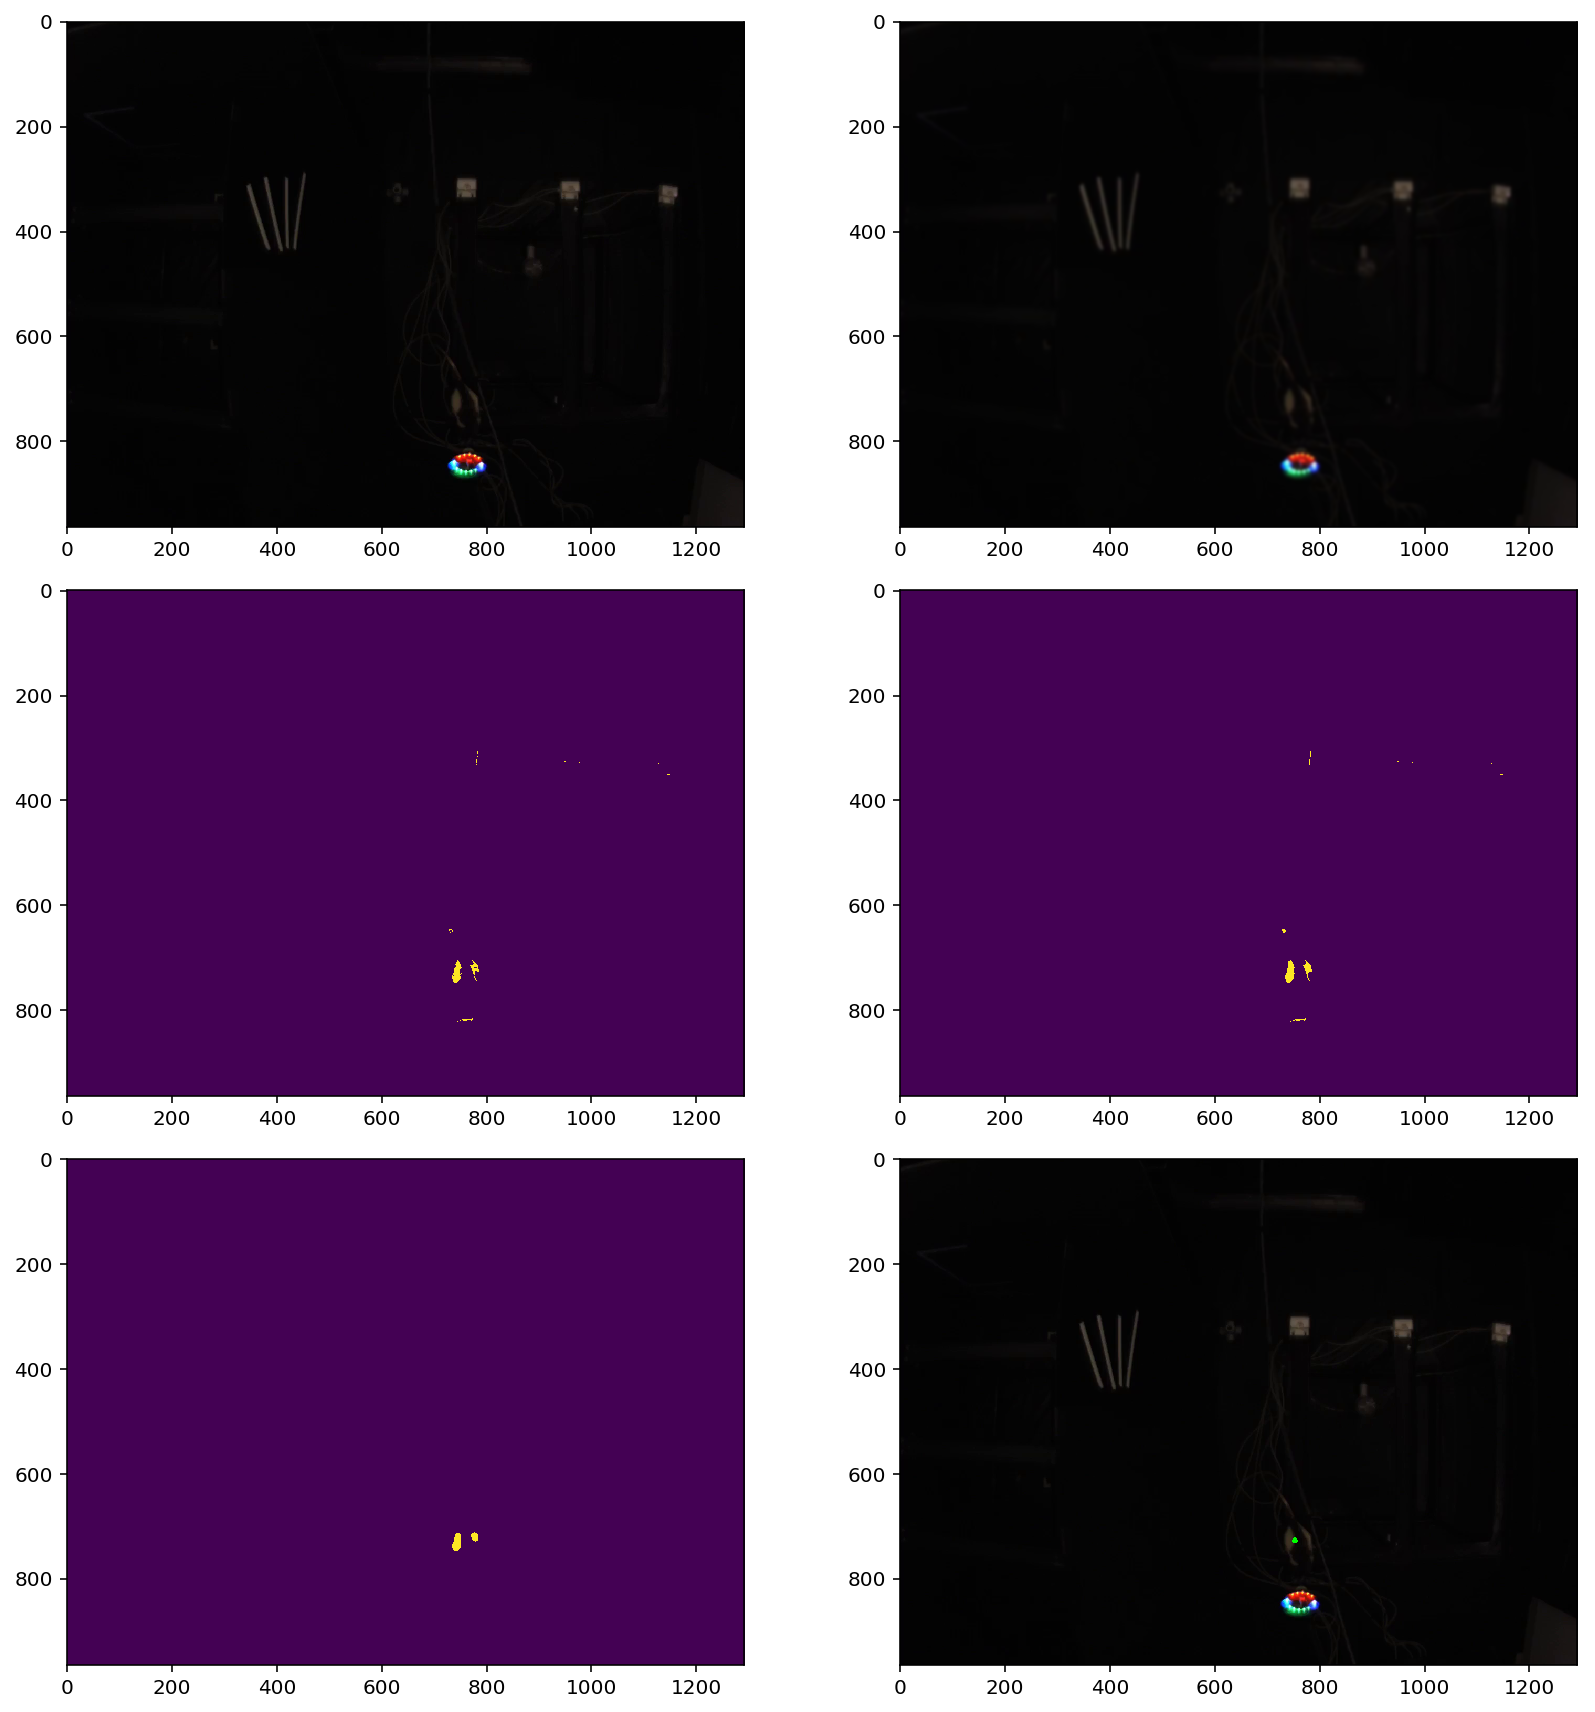

In [459]:
plot_color_detection(frame, convert_hsv(min_body), convert_hsv(max_body),
                     blur_kernel=(15, 15), morph_kernel=(11, 11))

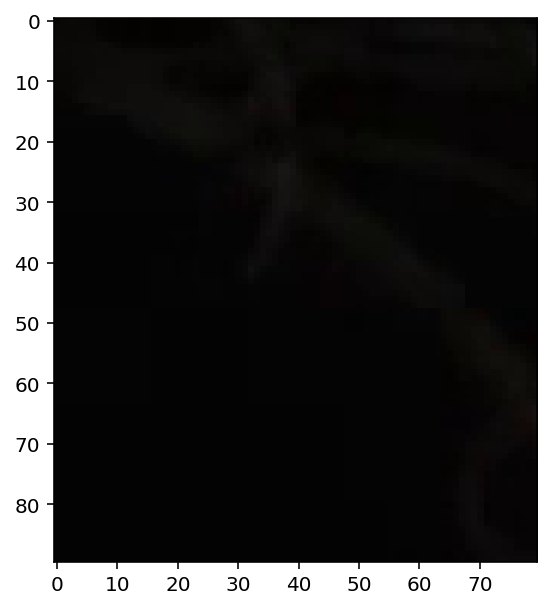

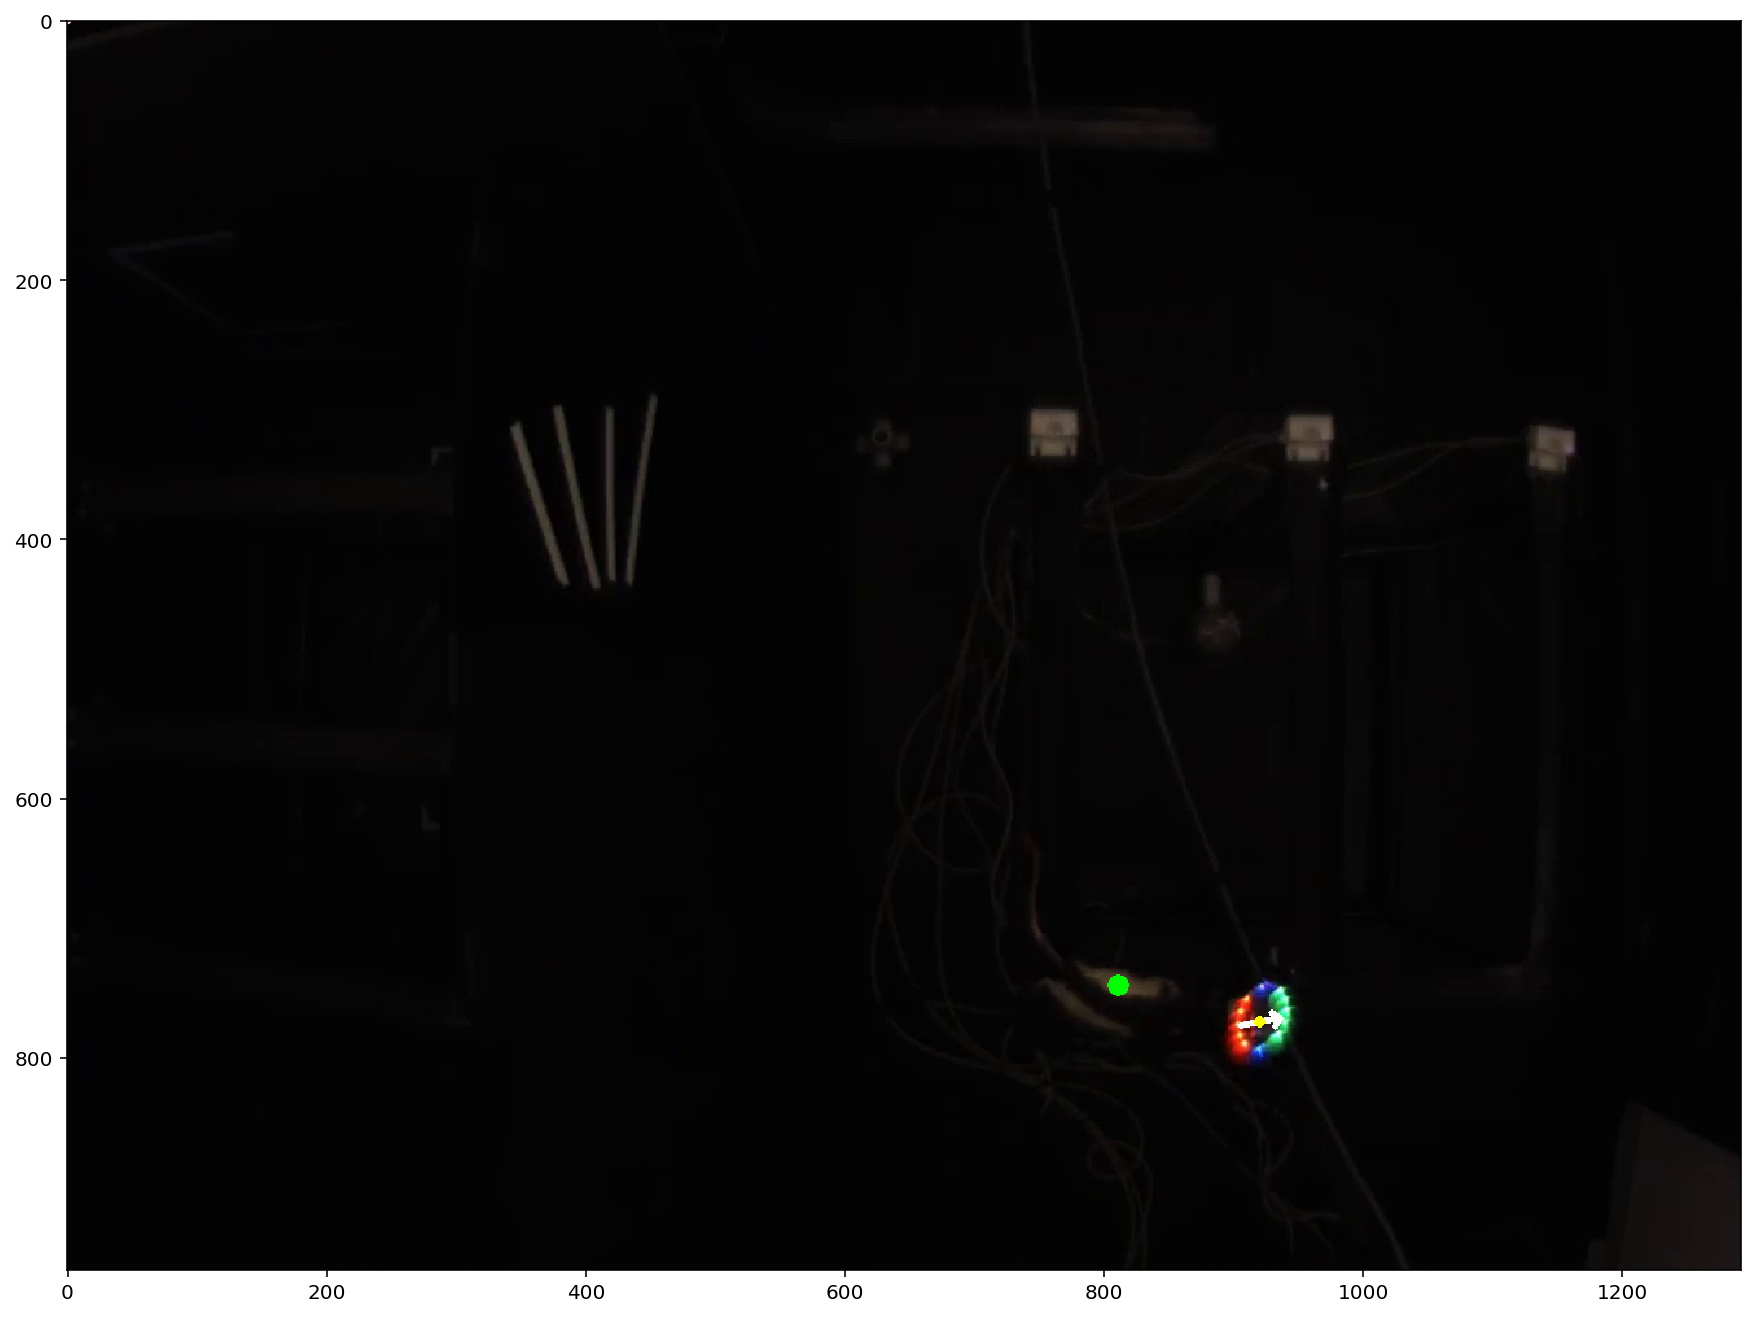

In [518]:
def get_centroid(frame, min_color, max_color, blur_kernel=(15, 15), morph_kernel=(5, 5)):
    frame_ = frame.copy()
    frame_ = cv2.GaussianBlur(frame_, blur_kernel, 0)
    frame_ = cv2.cvtColor(frame_, cv2.COLOR_RGB2HSV)
    frame_ = cv2.inRange(frame_, min_color, max_color)
    KERNEL = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, morph_kernel)
    frame_ = cv2.morphologyEx(frame_, cv2.MORPH_CLOSE, KERNEL)
    frame_ = cv2.morphologyEx(frame_, cv2.MORPH_OPEN, KERNEL)

    moments = cv2.moments(frame_)
    try:
        return (
            int(moments['m10'] / moments['m00']),
            int(moments['m01'] / moments['m00'])
        )
    except ZeroDivisionError:
        return (-1, -1)


f = frame.copy()
RGB_GREEN = (0, 255, 0)
RGB_RED = (255, 0, 0)
RGB_PINK = (255, 192, 203)
RGB_WHITE = (255, 255, 255)
RGB_YELLOW = (255, 255, 0)


red_centroid = get_centroid(frame, convert_hsv(min_red), convert_hsv(max_red))
green_centroid = get_centroid(frame, convert_hsv(min_green), convert_hsv(max_green))

blue_centroid = get_centroid(frame, convert_hsv(min_blue), convert_hsv(max_blue))
all_centroid = get_centroid(frame, convert_hsv(min_all), convert_hsv(max_all))

body_centroid = get_centroid(frame, convert_hsv(min_body), convert_hsv(max_body),
                             blur_kernel=(15, 15), morph_kernel=(11, 11))

cv2.arrowedLine(f, red_centroid, green_centroid, RGB_WHITE, 4, 8, 0, 0.25)
cv2.circle(f, blue_centroid, 4, RGB_PINK, -1, cv2.CV_8U)
cv2.circle(f, all_centroid, 4, RGB_YELLOW, -1, cv2.CV_8U)
cv2.circle(f, body_centroid, 8, RGB_GREEN, -1, cv2.CV_8U)

plt.figure(figsize=(5, 5))
plt.imshow(f[800:890, 720:800]);

plt.figure(figsize=(15, 15))
plt.imshow(f);

In [631]:
from tqdm import tqdm_notebook as tqdm

video = cv2.VideoCapture('../Raw-Data/vx1_JZ1/raw/20161121/20161121_JZ1_02.1.mp4')
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
frame_size = (int(video.get(3)), int(video.get(4)))
frame_rate = video.get(5)
n_frames = int(video.get(7))
out = cv2.VideoWriter('output.avi', fourcc, frame_rate, frame_size, True)

red_centroid_over_time = []
green_centroid_over_time = []
body_centroid_over_time = []
all_centroid_over_time = []

for _ in tqdm(range(n_frames - 1)):
    is_grabbed, frame = video.read() 
    if is_grabbed: 
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        red_centroid = get_centroid(frame, convert_hsv(min_red), convert_hsv(max_red))
        green_centroid = get_centroid(frame, convert_hsv(min_green), convert_hsv(max_green))

        blue_centroid = get_centroid(frame, convert_hsv(min_blue), convert_hsv(max_blue))
        all_centroid = get_centroid(frame, convert_hsv(min_all), convert_hsv(max_all))

        body_centroid = get_centroid(frame, convert_hsv(min_body), convert_hsv(max_body),
                                     blur_kernel=(15, 15), morph_kernel=(11, 11))
        
        red_centroid_over_time.append(red_centroid)
        green_centroid_over_time.append(green_centroid)
        body_centroid_over_time.append(body_centroid)
        all_centroid_over_time.append(all_centroid)

        cv2.arrowedLine(frame, red_centroid, green_centroid, RGB_WHITE, 4, 8, 0, 0.25)
        cv2.circle(frame, blue_centroid, 4, RGB_PINK, -1, cv2.CV_8U)
        cv2.circle(frame, all_centroid, 4, RGB_YELLOW, -1, cv2.CV_8U)
        cv2.circle(frame, body_centroid, 8, RGB_GREEN, -1, cv2.CV_8U)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        out.write(frame)
    else:
        break
        

video.release()
out.release()
cv2.destroyAllWindows()

error: OpenCV(3.4.1) /Users/travis/miniconda3/conda-bld/opencv_1533265002862/work/modules/videoio/src/container_avi.cpp:737: error: (-215) pos < (1u<<31) in function patchInt


In [641]:
red_centroid_over_time = np.array(red_centroid_over_time).astype(np.float)
green_centroid_over_time = np.array(green_centroid_over_time).astype(np.float)
body_centroid_over_time = np.array(body_centroid_over_time).astype(np.float)
all_centroid_over_time = np.array(all_centroid_over_time).astype(np.float)

red_centroid_over_time[red_centroid_over_time == -1] = np.nan
green_centroid_over_time[green_centroid_over_time == -1] = np.nan
body_centroid_over_time[body_centroid_over_time == -1] = np.nan
all_centroid_over_time[all_centroid_over_time == -1] = np.nan

red_centroid_over_time[:, 1] = frame_size[1] - red_centroid_over_time[:, 1]
green_centroid_over_time[:, 1] = frame_size[1] - green_centroid_over_time[:, 1]
body_centroid_over_time[:, 1] = frame_size[1] - body_centroid_over_time[:, 1]
all_centroid_over_time[:, 1] = frame_size[1] - all_centroid_over_time[:, 1]

all_centroid_over_time = np.savez('all_centroid_over_time.npz', all_centroid_over_time)
green_centroid_over_time = np.savez('green_centroid_over_time.npz', green_centroid_over_time)
red_centroid_over_time = np.savez('red_centroid_over_time.npz', red_centroid_over_time)
body_centroid_over_time = np.savez('body_centroid_over_time.npz', body_centroid_over_time)

In [7]:
all_centroid_over_time = np.load('all_centroid_over_time.npz')['arr_0']
green_centroid_over_time = np.load('green_centroid_over_time.npz')['arr_0']
red_centroid_over_time = np.load('red_centroid_over_time.npz')['arr_0']
body_centroid_over_time = np.load('body_centroid_over_time.npz')['arr_0']

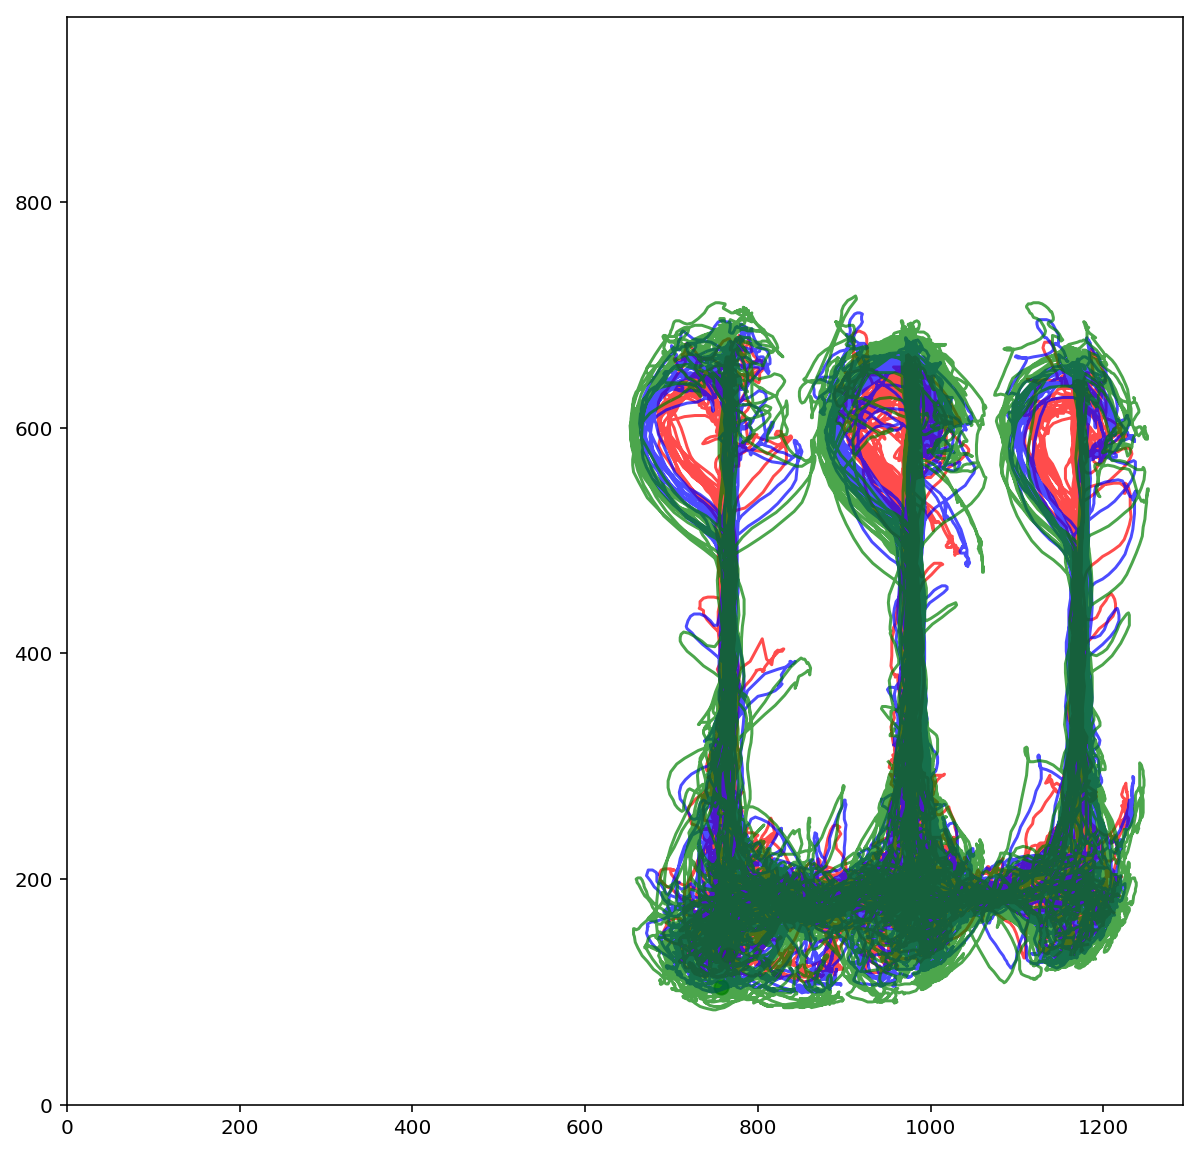

In [8]:
plt.figure(figsize=(10, 10))
ALPHA = 0.7
plt.scatter(red_centroid_over_time[0:1, 0], red_centroid_over_time[0:1, 1], s=50, color='red', alpha=ALPHA);
plt.plot(red_centroid_over_time[:, 0], red_centroid_over_time[:, 1], color='red', alpha=ALPHA);
plt.plot(all_centroid_over_time[:, 0], all_centroid_over_time[:, 1], color='blue', alpha=ALPHA);
plt.plot(green_centroid_over_time[:, 0], green_centroid_over_time[:, 1], color='green', alpha=ALPHA);
plt.scatter(green_centroid_over_time[0:1, 0], green_centroid_over_time[0:1, 1], s=50, color='green', alpha=ALPHA);
plt.xlim((0, frame_size[0]))
plt.ylim((0, frame_size[1]));

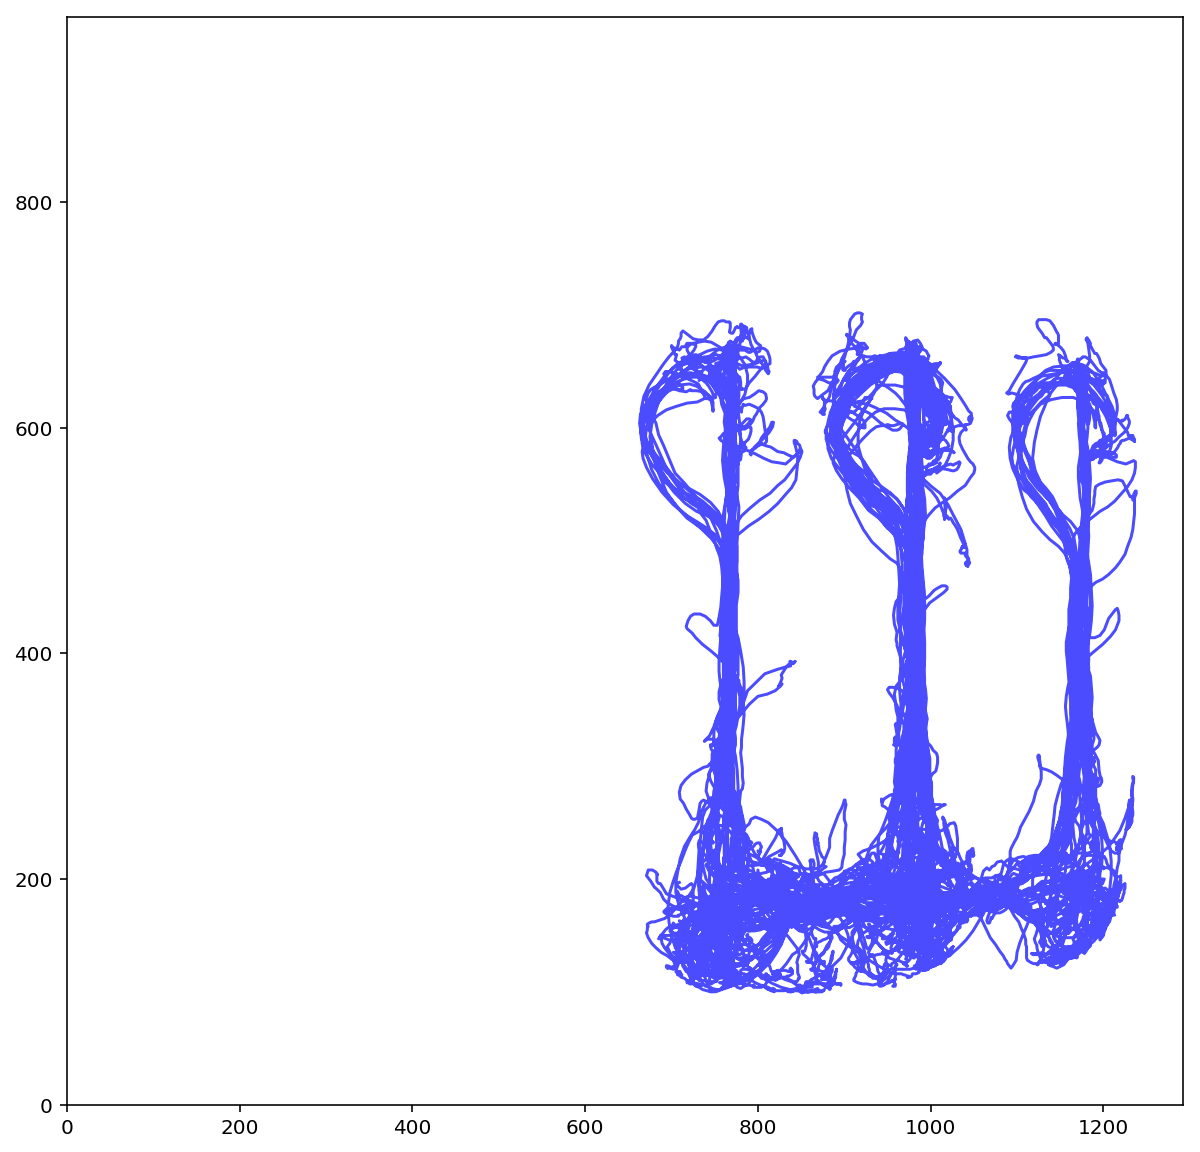

In [9]:
plt.figure(figsize=(10, 10))
ALPHA = 0.7
plt.plot(all_centroid_over_time[:, 0], all_centroid_over_time[:, 1], color='blue', alpha=ALPHA);
plt.xlim((0, frame_size[0]))
plt.ylim((0, frame_size[1]));

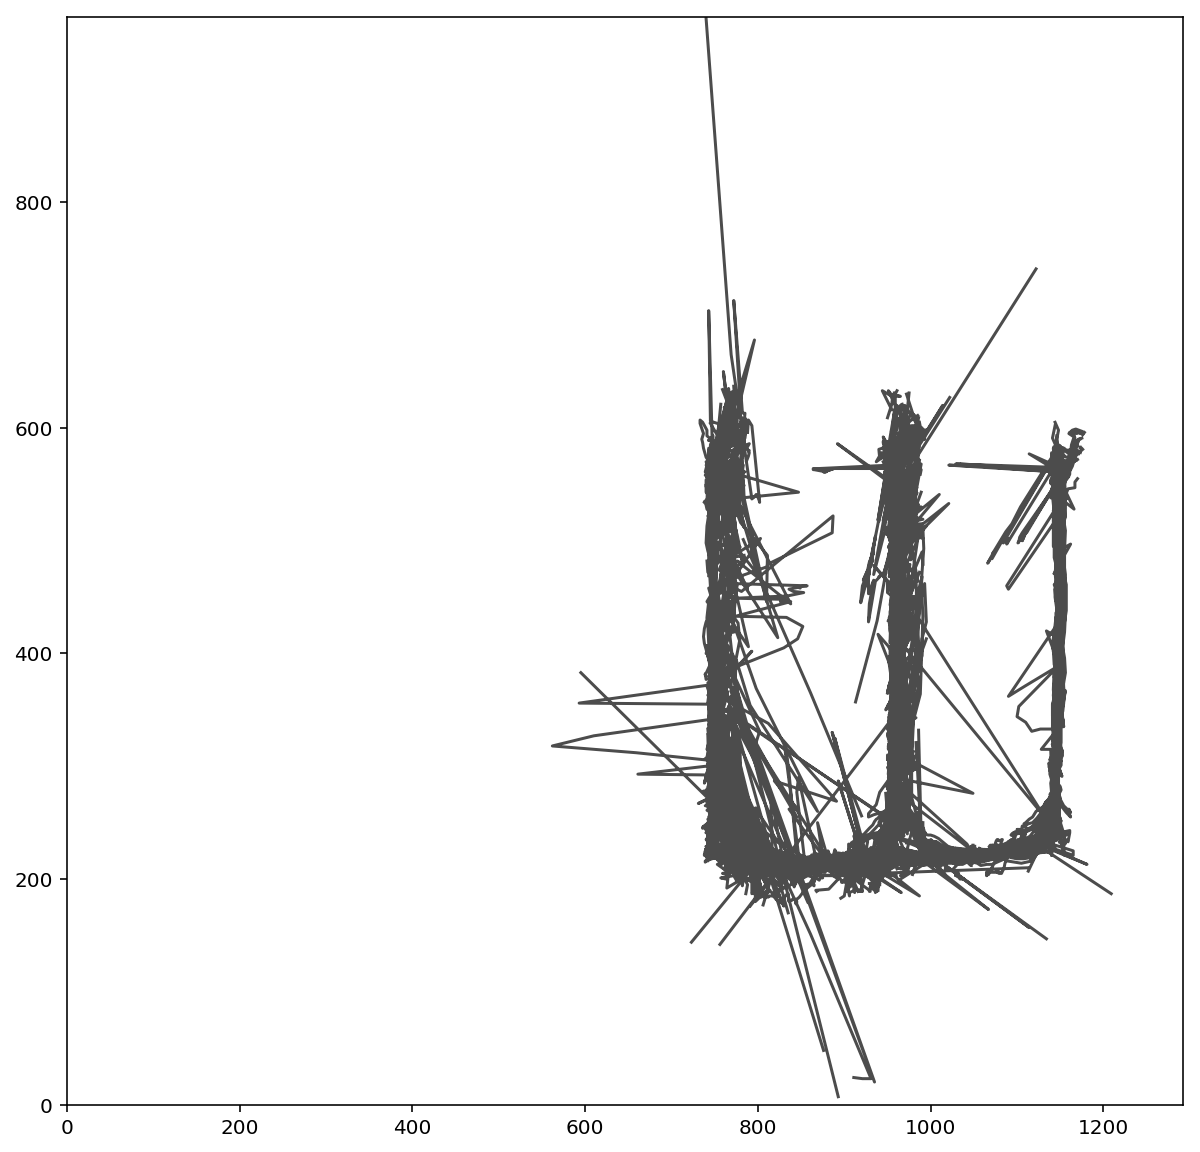

In [10]:
plt.figure(figsize=(10, 10))

plt.plot(body_centroid_over_time[:, 0], body_centroid_over_time[:, 1], color='black', alpha=ALPHA);
plt.xlim((0, frame_size[0]))
plt.ylim((0, frame_size[1]));

36464
36599


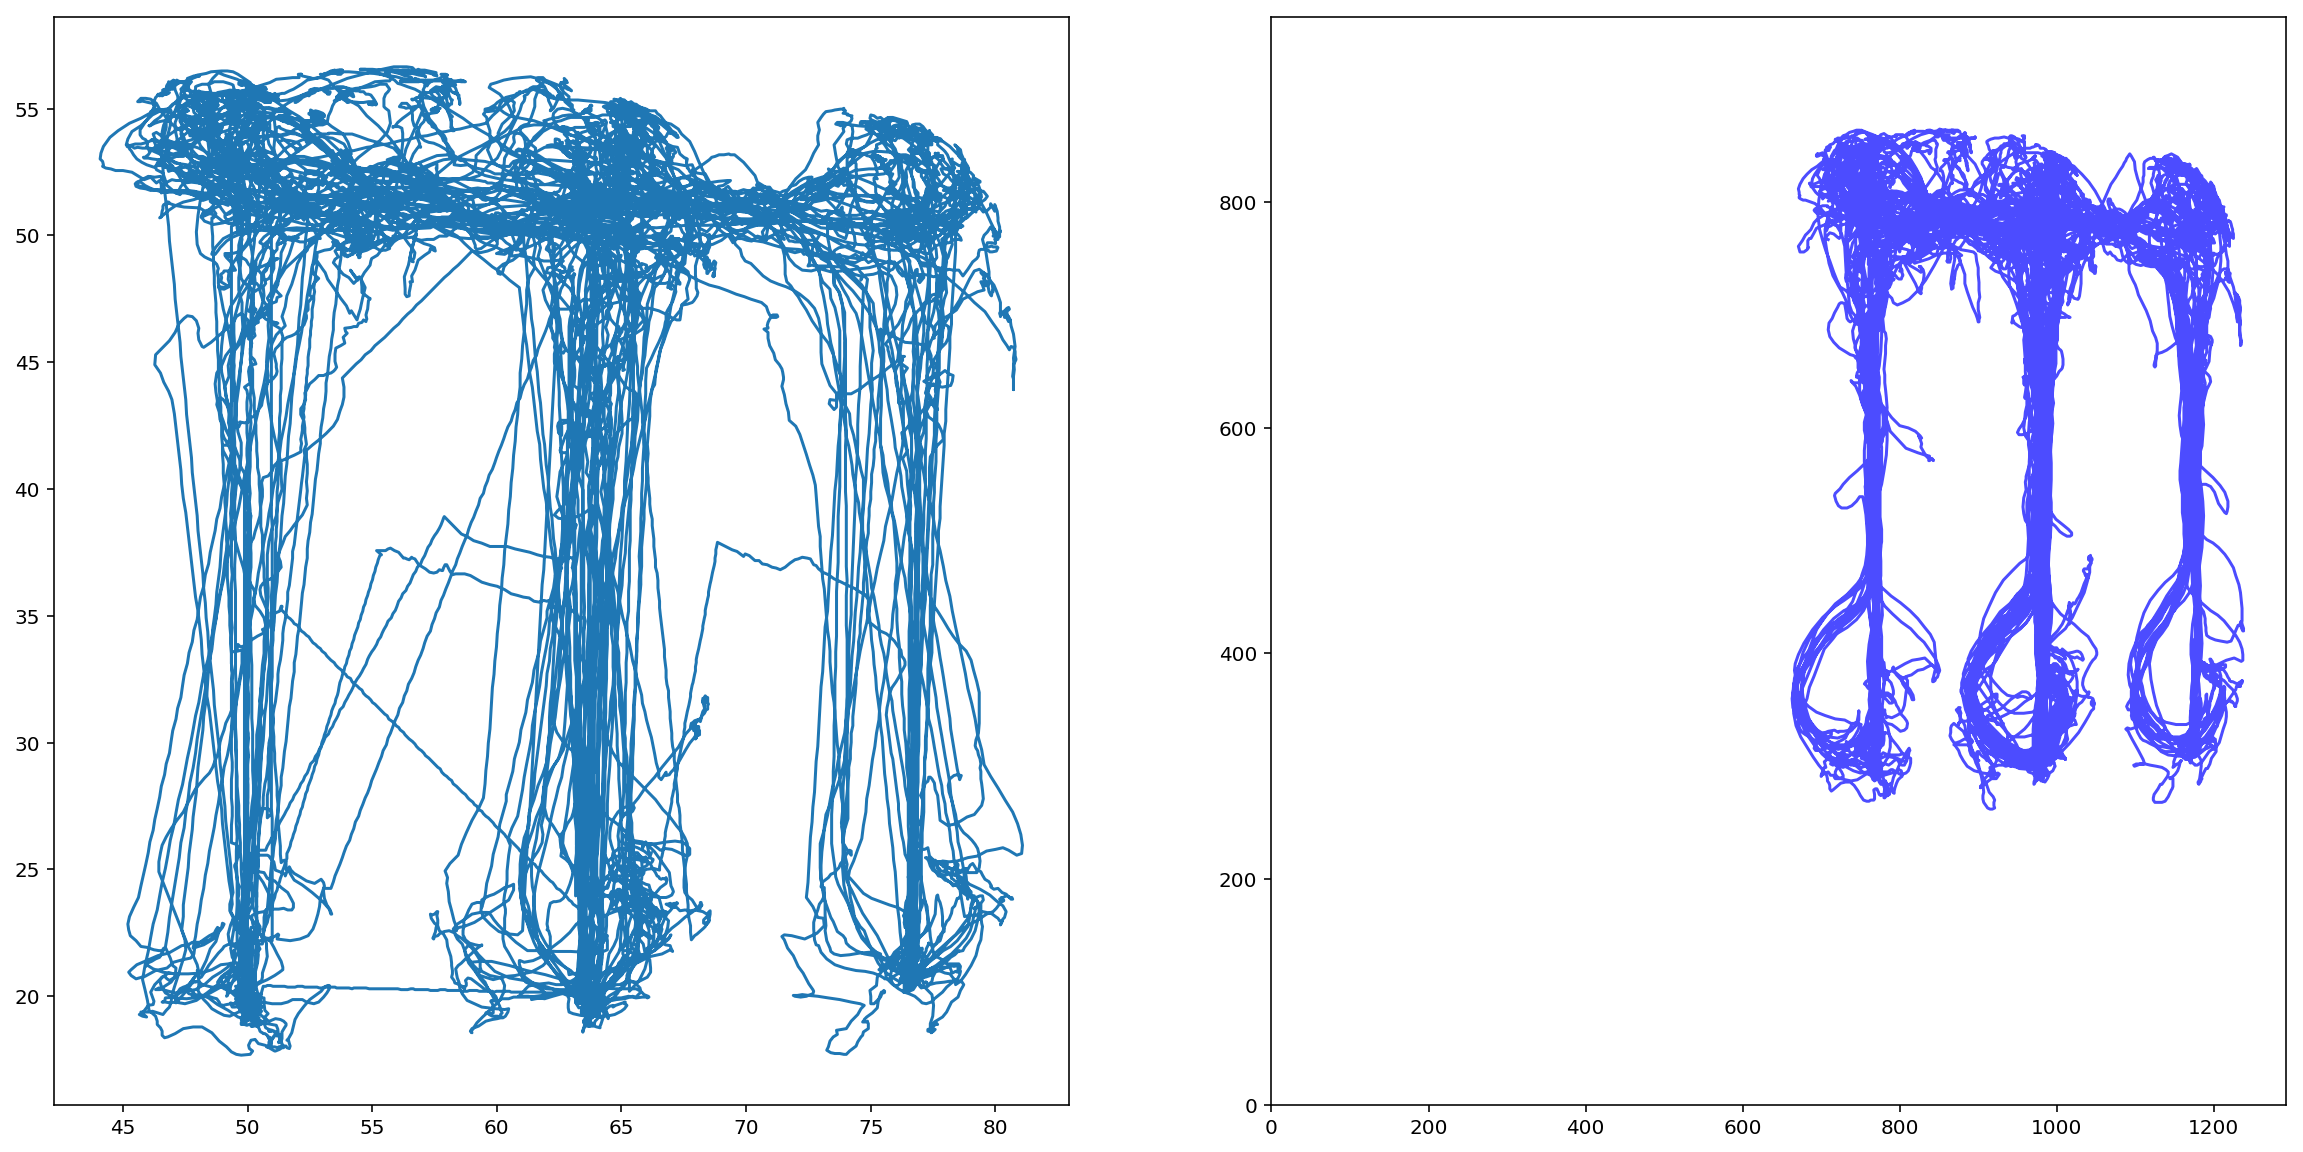

In [12]:
from loren_frank_data_processing import get_position_dataframe
from src.parameters import ANIMALS

epoch_key = ('JZ1', 7, 2)
position_info = get_position_dataframe(epoch_key, ANIMALS)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].plot(position_info.x_position, position_info.y_position);

ALPHA = 0.7
axes[1].plot(all_centroid_over_time[:, 0], frame_size[1] - all_centroid_over_time[:, 1], color='blue', alpha=ALPHA);
axes[1].set_xlim((0, frame_size[0]))
axes[1].set_ylim((0, frame_size[1]));

print(body_centroid_over_time.shape[0])
print(position_info.shape[0])

### Kalman Filter, Constant Velocity

In [224]:
# State Transition
F = np.eye(4)
dt = 1 / 29
F[0, 2] = dt
F[1, 3] = dt
F

array([[1.        , 0.        , 0.03448276, 0.        ],
       [0.        , 1.        , 0.        , 0.03448276],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [225]:
# Measurement Function -- converts state vector to observable space
H = np.zeros((2, 4))
H[0, 0] = 1
H[1, 1] = 1
H

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [226]:
# Process noise
# Need better Q

Q = np.diag([1, 1, 5, 5])

Q = [[(dt**3)/3., 0.0, (dt**2)/2., 0.0],
     [0.0, (dt**3)/3., 0.0, (dt**2)/2.],
     [(dt**2)/2., 0.0,    dt, 0.0],
     [0.0, (dt**2)/2., 0.0,    dt]]
Q = np.array(Q) * 1
Q

array([[1.36673637e-05, 0.00000000e+00, 5.94530321e-04, 0.00000000e+00],
       [0.00000000e+00, 1.36673637e-05, 0.00000000e+00, 5.94530321e-04],
       [5.94530321e-04, 0.00000000e+00, 3.44827586e-02, 0.00000000e+00],
       [0.00000000e+00, 5.94530321e-04, 0.00000000e+00, 3.44827586e-02]])

In [18]:
# import sympy
# from sympy import (init_printing, Matrix, MatMul, 
#                    integrate, symbols)

# init_printing(use_latex='mathjax')
# dt, phi = symbols('\Delta{t} \Phi_s')
# F_k = Matrix([[1, dt, dt**2/2],
#               [0,  1,      dt],
#               [0,  0,       1]])
# Q_c = Matrix([[0, 0, 0],
#               [0, 0, 0],
#               [0, 0, 1]])*phi

# Q = integrate(F_k * Q_c * F_k.T, (dt, 0, dt))

# # factor phi out of the matrix to make it more readable
# Q = Q / phi
# MatMul(Q, phi)

⎡         5           4           3⎤      
⎢\Delta{t}   \Delta{t}   \Delta{t} ⎥      
⎢──────────  ──────────  ──────────⎥      
⎢    20          8           6     ⎥      
⎢                                  ⎥      
⎢         4           3           2⎥      
⎢\Delta{t}   \Delta{t}   \Delta{t} ⎥      
⎢──────────  ──────────  ──────────⎥⋅\Phiₛ
⎢    8           3           2     ⎥      
⎢                                  ⎥      
⎢         3           2            ⎥      
⎢\Delta{t}   \Delta{t}             ⎥      
⎢──────────  ──────────  \Delta{t} ⎥      
⎣    6           2                 ⎦      

In [227]:
# Observation covariance
R = np.diag([1, 1]) * 0.1
R

array([[0.1, 0. ],
       [0. , 0.1]])

In [47]:
def kalman_filter(zs, F, H, Q, R, init_x, init_P):
    '''
    
    Parameters
    ----------
    zs : ndarray, shape (n_time, n_observables)
        Observations
    F : ndarray, shape (n_states, n_states)
        State transition matrix
    H : ndarray, shape (n_observables, n_states)
        Measurement function/Observation Model
    Q : ndarray, shape (n_states, n_states)
        Process covariance
    R : ndarray, shape (n_observables, n_observables)
        Observation covariance
    init_x : ndarray, shape (n_states,)
        Initial state
    init_P : ndarray, shape (n_states, n_states)
        Initial state covariance (belief in state)
    
    Returns
    -------
    xs : ndarray (n_time, n_states)
        posterior mean
    cov : ndarray (n_time, n_states, n_states)
        posterior covariance
    '''
    xs, cov = [], []
    x = init_x.copy()
    P = init_P.copy()
    n_states = len(x)
    I = np.eye(n_states)
    
    for z in zs:
        # predict
        x = F @ x # next state
        P = F @ P @ F.T + Q # next error covariance

        # update
        S = H @ P @ H.T + R  # system uncertainty
        K = P @ H.T @ np.linalg.pinv(S) # Kalman Gain (n_states, n_observables), prediction uncertainty vs. measurement uncertainty
        # Handle missing data by not updating the estimate and covariance
        y = z - H @ x # innovation/error
        y[np.isnan(z)] = 0.0
        K[:, np.isnan(z)] = 0.0
        
        x += K @ y # Update estimate

        # Update covariance
        # P = P - K @ H @ P
        # P = (I-KH)P(I-KH)' + KRK'
        I_KH = I - K @ H
        P = I_KH @ P @ I_KH.T + K @ R @ K.T
        
        xs.append(x)
        cov.append(P)

    return np.array(xs), np.array(cov)



def kalman_filter2(data, state_transition, state_to_observed,
                   state_covariance, measurement_covariance,
                   prior_state, prior_covariance):
    '''Handles missing observations
    
    Parameters
    ----------
    data : ndarray, shape (n_time, n_observables)
        Observations from sensors
    state_transition : ndarray, shape (n_states, n_states)
        State transition matrix, F
    state_to_observed : ndarray, shape (n_observables, n_states)
        Measurement function/Observation Model, H
    state_covariance : ndarray, shape (n_states, n_states)
        Process covariance, Q
    measurement_covariance : ndarray, shape (n_observables, n_observables)
        Observation covariance, R
    prior_state : ndarray, shape (n_states,)
        Initial state mean
    prior_covariance : ndarray, shape (n_states, n_states)
        Initial state covariance (belief in state)
    
    Returns
    -------
    posterior_mean : ndarray (n_time, n_states)
    posterior_covariance : ndarray (n_time, n_states, n_states)
    
    '''
    n_time, n_states = data.shape[0], state_transition.shape[0]
    posterior_mean = np.zeros((n_time, n_states))
    posterior_covariance = np.zeros((n_time, n_states, n_states))
    
    posterior_mean[0] = prior_state.copy()
    posterior_covariance[0] = prior_covariance.copy()
    
    I = np.eye(n_states)
    
    for time_ind in np.arange(1, n_time):
        # Predict
        prior_mean = state_transition @ posterior_mean[time_ind - 1]
        prior_covariance = (
            state_transition @ posterior_covariance[time_ind - 1] @ state_transition.T
            + state_covariance)
        
        # Update
        system_uncertainty = (
            state_to_observed @ prior_covariance @ state_to_observed.T
            + measurement_covariance)
        
        # kalman gain (n_states, n_observables), prediction uncertainty vs. measurement uncertainty
        kalman_gain = prior_covariance @ state_to_observed.T @ np.linalg.pinv(system_uncertainty)
        prediction_error = data[time_ind] - state_to_observed @ prior_mean # innovation
        
        # Handle missing data by not updating the estimate and covariance
        is_missing = np.isnan(data[time_ind])
        prediction_error[is_missing] = 0.0
        kalman_gain[:, is_missing] = 0.0
        
        # Update mean
        posterior_mean[time_ind] = prior_mean + kalman_gain @ prediction_error
        
        # Update covariance
        I_KH = I - kalman_gain @ state_to_observed
        posterior_covariance[time_ind] = (
            I_KH @ prior_covariance @ I_KH.T +
            kalman_gain @ measurement_covariance @ kalman_gain.T)

    
    return posterior_mean, posterior_covariance


def rts_smoother(posterior_mean, posterior_covariance, state_transition, state_covariance):
    """
    Runs the Rauch-Tung-Striebal Kalman smoother on a set of
    means and covariances computed by a Kalman filter. The usual input
    would come from the output of `KalmanFilter.batch_filter()`.
    Parameters
    ----------
    Xs : numpy.array
       array of the means (state variable x) of the output of a Kalman
       filter.
    Ps : numpy.array
        array of the covariances of the output of a kalman filter.
    Fs : list-like collection of numpy.array, optional
        State transition matrix of the Kalman filter at each time step.
        Optional, if not provided the filter's self.F will be used
    Qs : list-like collection of numpy.array, optional
        Process noise of the Kalman filter at each time step. Optional,
        if not provided the filter's self.Q will be used
    inv : function, default numpy.linalg.inv
        If you prefer another inverse function, such as the Moore-Penrose
        pseudo inverse, set it to that instead: kf.inv = np.linalg.pinv
    Returns
    -------
    x : numpy.ndarray
       smoothed means
    P : numpy.ndarray
       smoothed state covariances
    K : numpy.ndarray
        smoother gain at each step
    Pp : numpy.ndarray
       Predicted state covariances
    Examples
    --------
    .. code-block:: Python
        zs = [t + random.randn()*4 for t in range (40)]
        (mu, cov, _, _) = kalman.batch_filter(zs)
        (x, P, K, Pp) = rts_smoother(mu, cov, kf.F, kf.Q)
    """
    n_time, n_states = posterior_mean.shape
    smoothed_mean, smoothed_covariances = posterior_mean.copy(), posterior_covariance.copy()
    
    for time_ind in np.arange(n_time - 2, -1, -1):
        prior_covariance = (
            state_transition @ posterior_covariance[time_ind] @ state_transition.T +
            state_covariance)
        smoother_gain = posterior_covariance[time_ind] @ state_transition.T @ np.linalg.pinv(prior_covariance)
        smoothed_mean[time_ind] += smoother_gain @ (smoothed_mean[time_ind + 1] - state_transition @ smoothed_mean[time_ind])
        smoothed_covariances[time_ind] += smoother_gain @ (smoothed_covariances[time_ind + 1] - prior_covariance) @ smoother_gain.T
        
    return smoothed_mean, smoothed_covariances


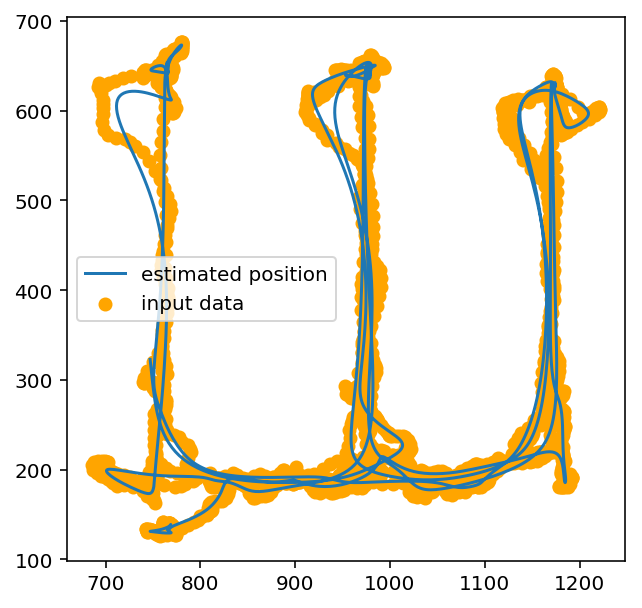

In [246]:
y = red_centroid_over_time[:3000]

init_x = np.array([y[0, 0], y[0, 1], 0, 0])
init_P = np.diag([5, 5, 100, 100])

xs, cov = kalman_filter2(y, F, H, Q, R, init_x, init_P)
xs, cov = rts_smoother(xs, cov, F, Q)

plt.figure(figsize=(5, 5))
plt.scatter(y[:, 0], y[:, 1], color='orange', label='input data')
plt.plot(xs[:, 0], xs[:, 1], label='estimated position')
plt.legend();

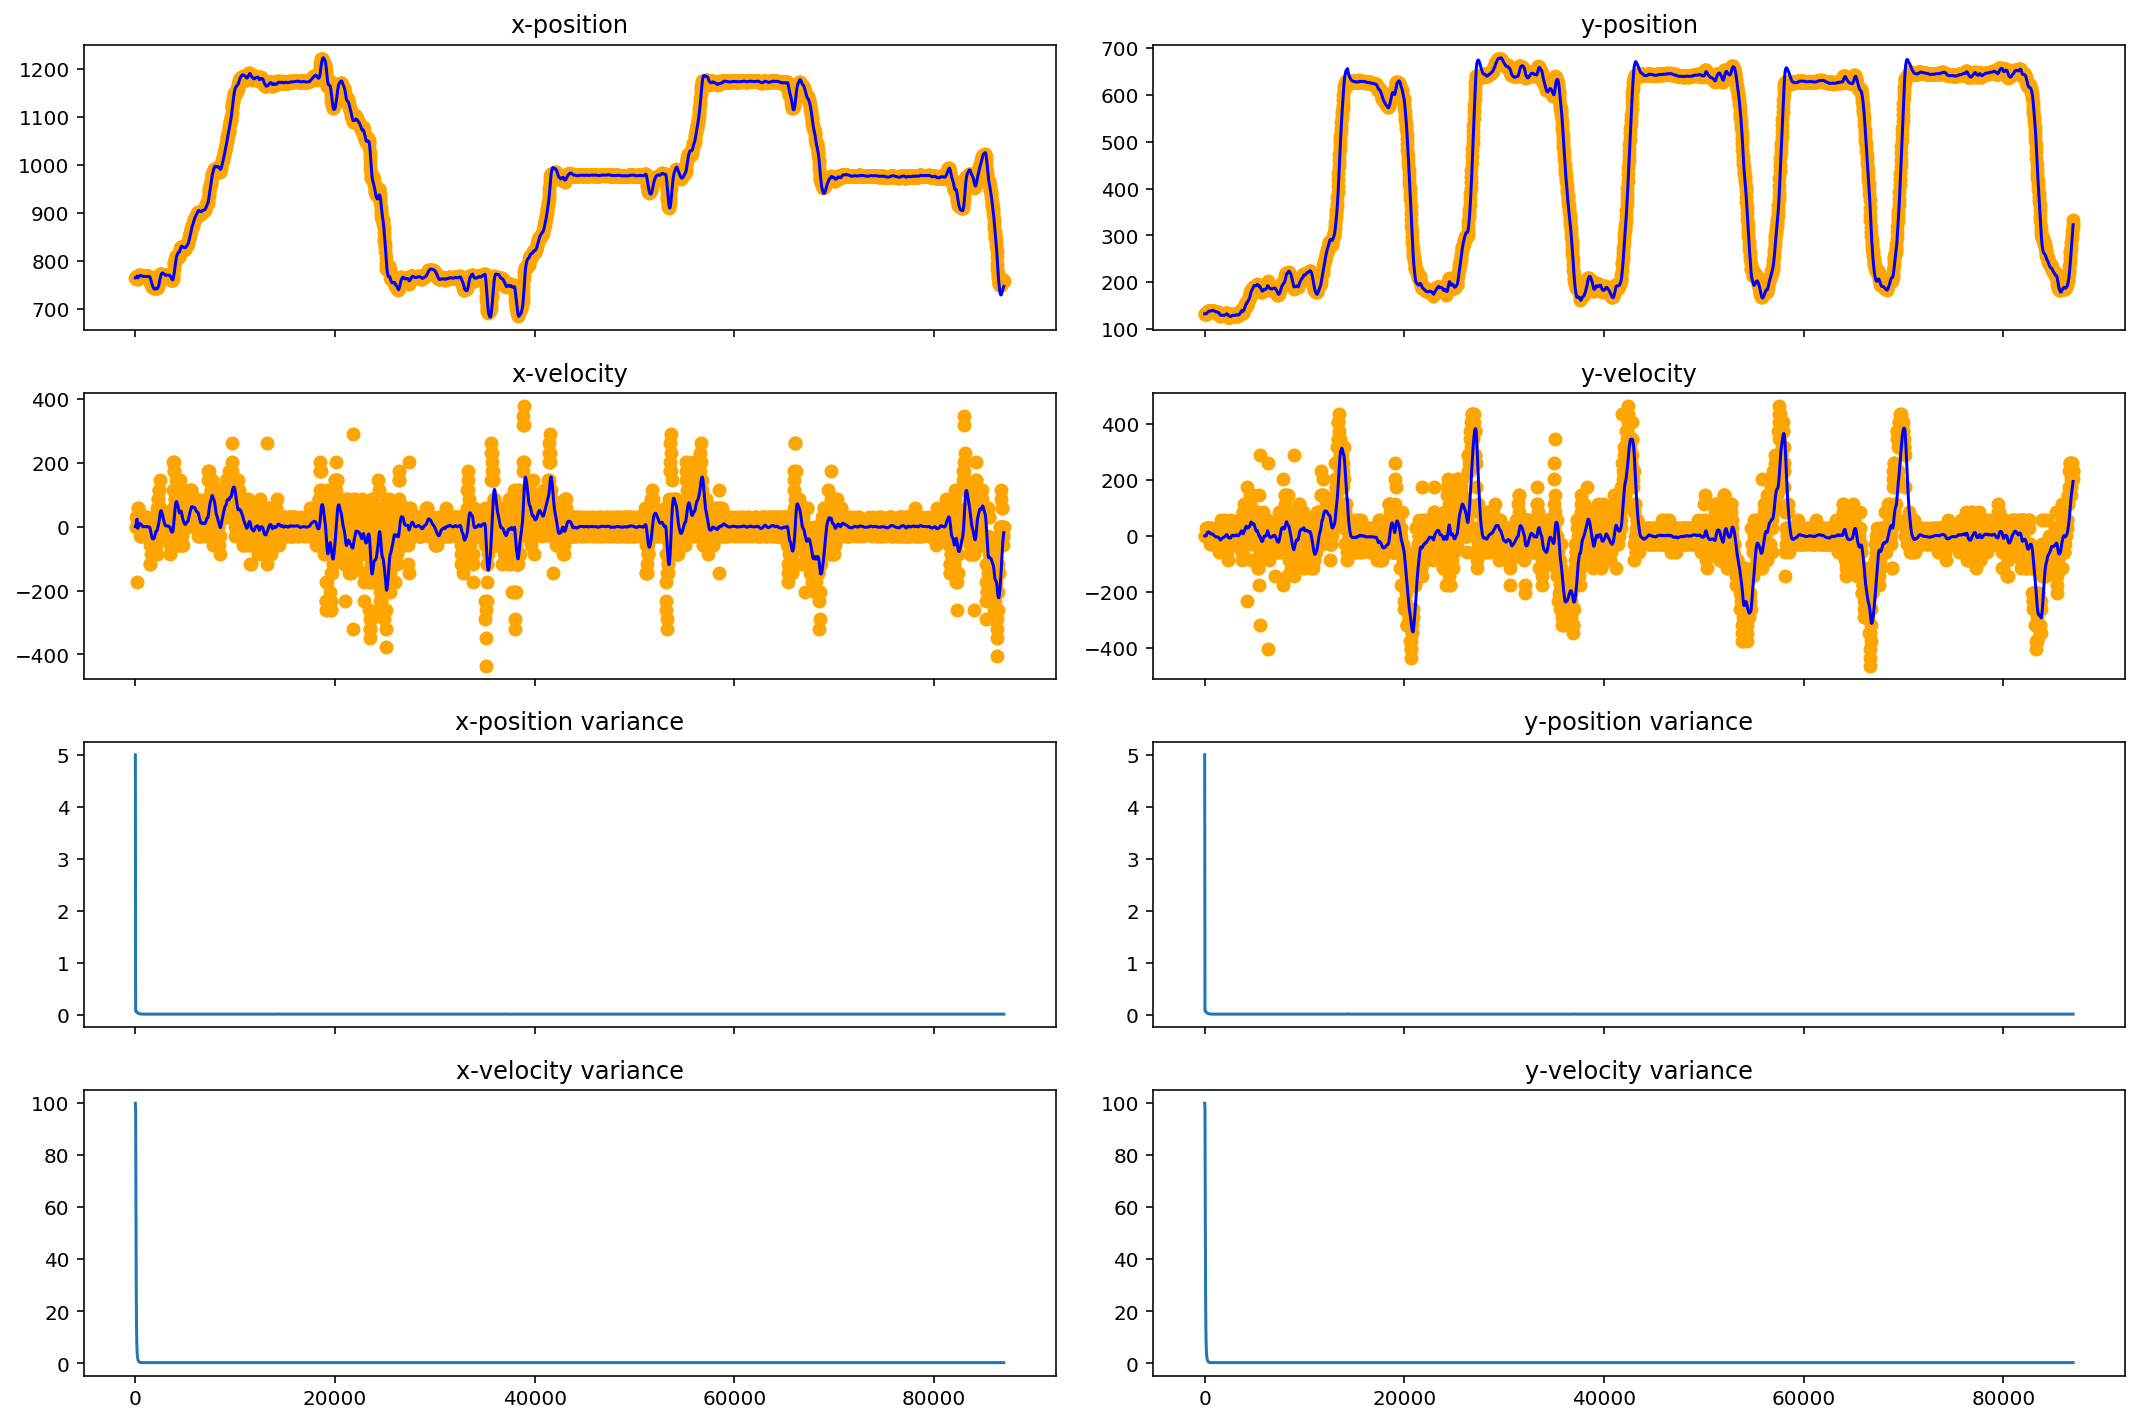

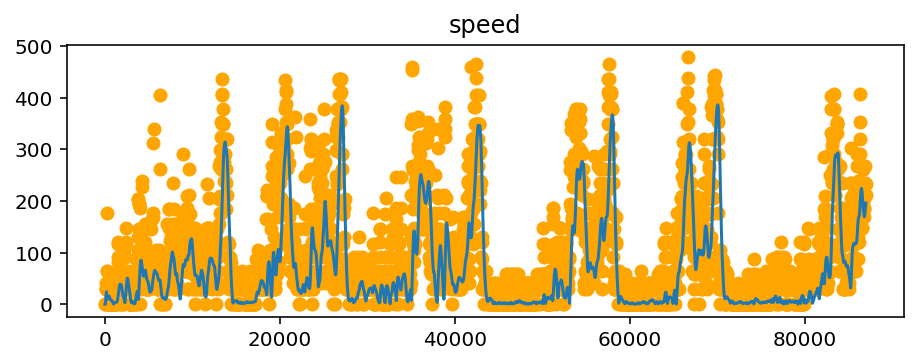

In [201]:
def estimate_speed(y, dt):
    distance = np.sqrt(np.sum(np.diff(y, axis=0) ** 2, axis=1))
    speed = distance / dt
    return np.concatenate((np.full((1,), np.nan), speed))

def estimate_velocity(y, dt):
    v = np.diff(y, axis=0) / dt
    return np.concatenate((np.full((1, y.shape[1]), np.nan), v))

fig, axes = plt.subplots(4, 2, figsize=(15, 10), sharex=True)
t = np.arange(y.shape[0]) / dt

axes[0, 0].scatter(t, y[:, 0], color='orange', label='input data')
axes[0, 0].plot(t, xs[:, 0], color='blue', label='estimated position')
axes[0, 0].set_title('x-position')

axes[0, 1].scatter(t, y[:, 1], color='orange', label='input data')
axes[0, 1].plot(t, xs[:, 1], color='blue', label='estimated position')
axes[0, 1].set_title('y-position')

s = estimate_speed(y, dt)
v = estimate_velocity(y, dt)

axes[1, 0].scatter(t, v[:, 0], color='orange', label='input data')
axes[1, 0].plot(t, xs[:, 2], color='blue', label='estimated position')
axes[1, 0].set_title('x-velocity')

axes[1, 1].scatter(t, v[:, 1], color='orange', label='input data')
axes[1, 1].plot(t, xs[:, 3], color='blue', label='estimated position')
axes[1, 1].set_title('y-velocity')

axes[2, 0].plot(t, cov[:, 0, 0])
axes[2, 0].set_title('x-position variance')

axes[2, 1].plot(t, cov[:, 1, 1])
axes[2, 1].set_title('y-position variance')

axes[3, 0].plot(t, cov[:, 2, 2])
axes[3, 0].set_title('x-velocity variance')

axes[3, 1].plot(t, cov[:, 3, 3])
axes[3, 1].set_title('y-velocity variance')

plt.tight_layout()

s = estimate_speed(y, dt)
speed = np.sqrt(np.sum(xs[:, 2:] ** 2, axis=1))

plt.figure(figsize=(7.5, 2.5))
plt.scatter(t, s, color='orange')
plt.plot(t, speed)
plt.title('speed');

### Kalman Filter, velocity and acceleration

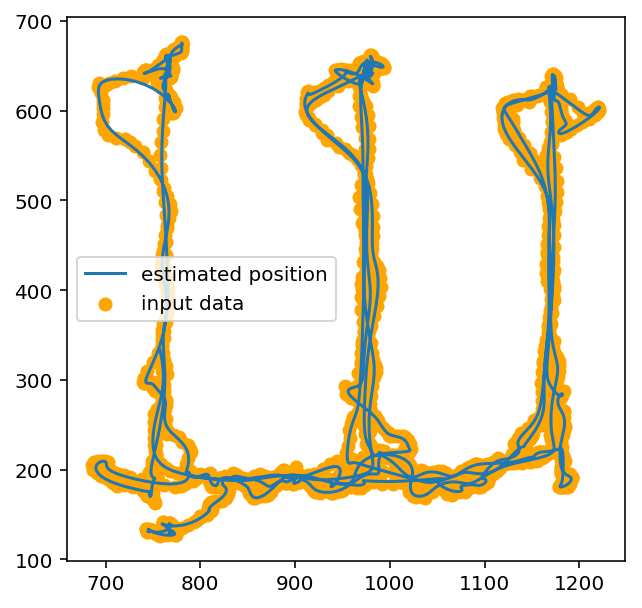

In [222]:
# State Transition

a = 0.5 * dt**2
d = dt

F = np.array(
    [[1, 0, d, 0, a, 0],
     [0, 1, 0, d, 0, a],
     [0, 0, 1, 0, d, 0],
     [0, 0, 0, 1, 0, d],
     [0, 0, 0, 0, 1, 0],
     [0, 0, 0, 0, 0, 1],
    ])

# Measurement Function -- converts state vector to observable space
H = np.zeros((2, 6))
H[0, 0] = 1
H[1, 1] = 1

# Process noise
Q = [[.25*dt**4,        0.0, .5*dt**3,      0.0, .5*dt**2,      0.0],
     [      0.0,  .25*dt**4,      0.0, .5*dt**3,      0.0, .5*dt**2],
     [ .5*dt**3,        0.0,    dt**2,      0.0,       dt,      0.0],
     [      0.0,   .5*dt**3,      0.0,    dt**2,      0.0,       dt],
     [ .5*dt**2,        0.0,       dt,      0.0,      1.0,      0.0],
     [      0.0,   .5*dt**2,      0.0,       dt,      0.0,      1.0]
    ]
Q = np.array(Q)

# Q = [[(dt**5)/20., 0.0, (dt**4)/8., 0.0, (dt**3)/6., 0.0],
#      [0.0, (dt**5)/20., 0.0, (dt**4)/8., 0.0, (dt**3)/6.],
#      [(dt**4)/8., 0.0, (dt**3)/3., 0.0, (dt**2)/2., 0.0],
#      [0.0, (dt**4)/8., 0.0, (dt**3)/3., 0.0, (dt**2)/2.],
#      [(dt**3)/6., 0.0, (dt**2)/2., 0.0, dt, 0.0],
#      [0.0, (dt**3)/6., 0.0, (dt**2)/2., 0.0, dt]]

# Q = np.array(Q) * 1E2
# Q = np.diag([1, 1, 5, 5, 10, 10])

# Observation Covariance
R = np.diag([1, 1]) * 1E-4

y = red_centroid_over_time[:3000]

init_x = np.array([y[0, 0], y[0, 1], 0, 0, 0, 0])
init_P = np.diag([1, 1, 500, 500, 500, 500])

xs, cov = kalman_filter2(y, F, H, Q, R, init_x, init_P)
xs, cov = rts_smoother(xs.copy(), cov.copy(), F, Q)

plt.figure(figsize=(5, 5))
plt.scatter(y[:, 0], y[:, 1], color='orange', label='input data')
plt.plot(xs[:, 0], xs[:, 1], label='estimated position')
plt.legend();

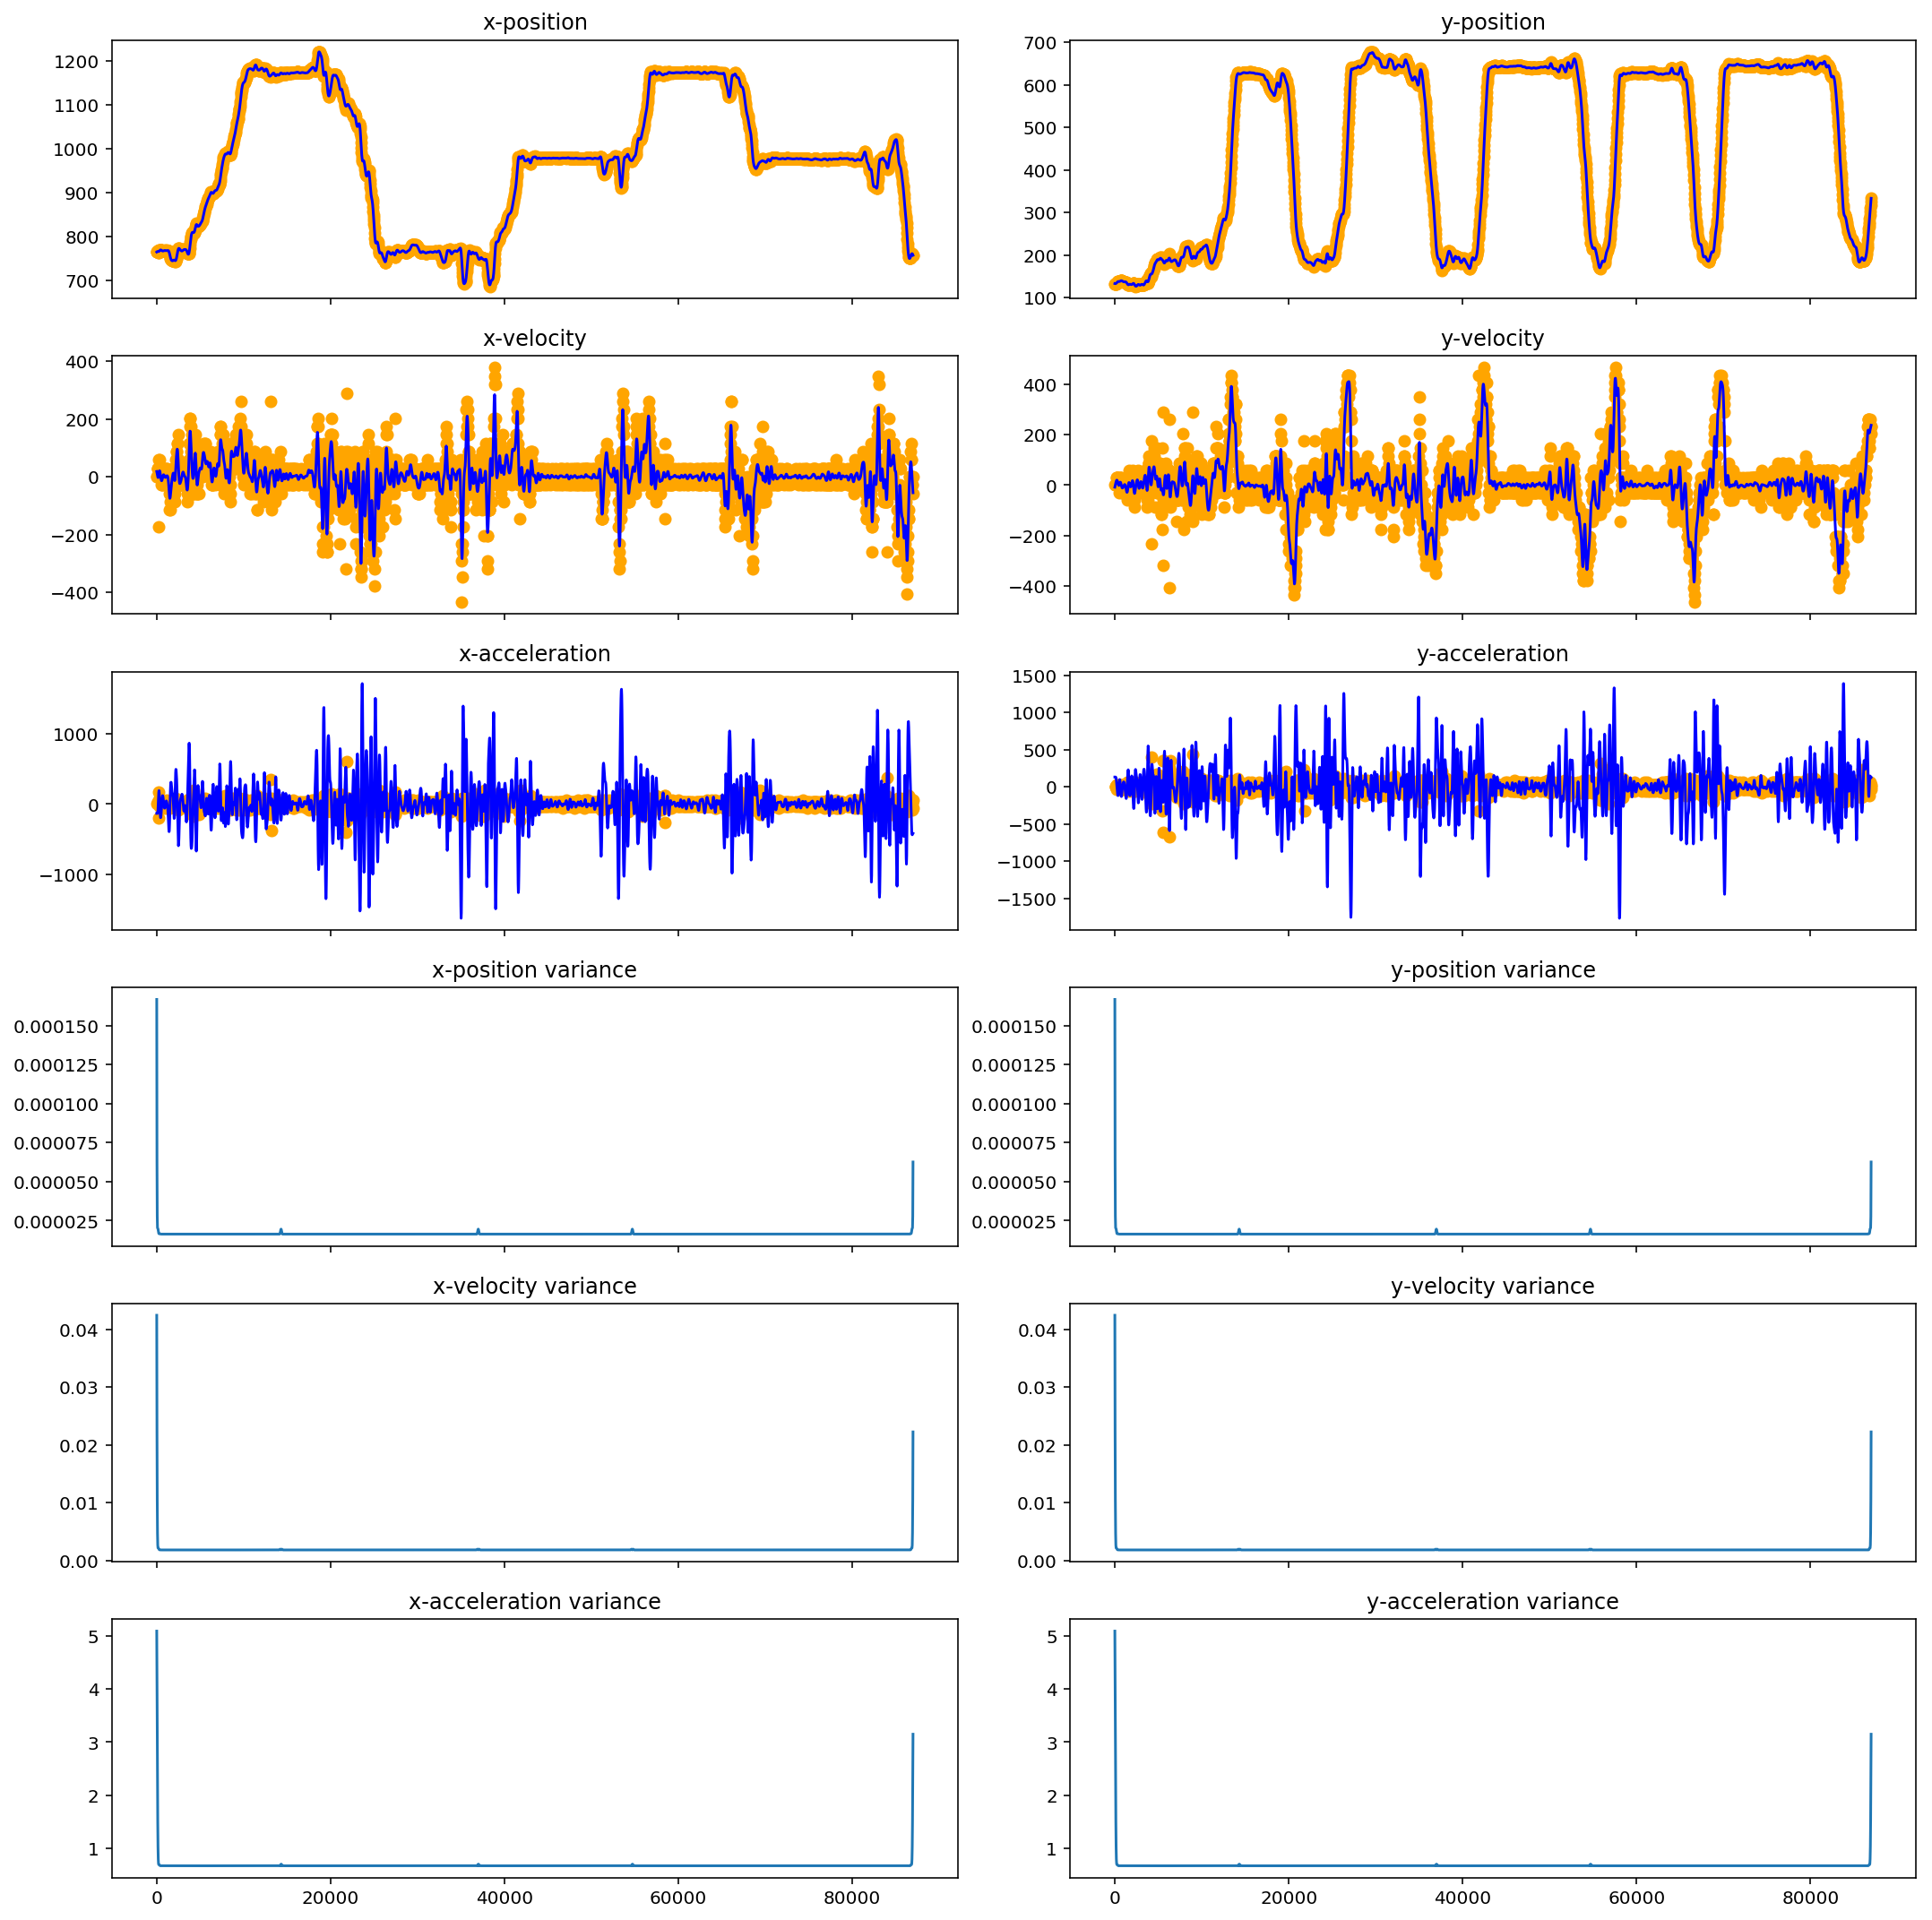

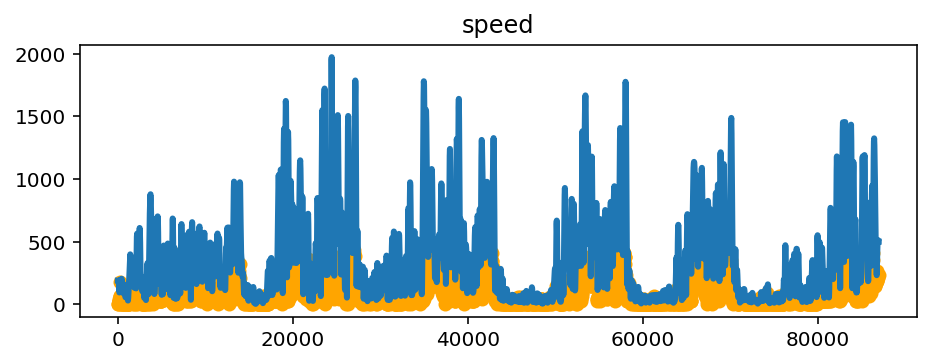

In [223]:
def estimate_speed(y, dt):
    distance = np.sqrt(np.sum(np.diff(y, axis=0) ** 2, axis=1))
    speed = distance / dt
    return np.concatenate((np.full((1,), np.nan), speed))

def estimate_velocity(y, dt):
    v = np.diff(y, axis=0) / dt
    return np.concatenate((np.full((1, y.shape[1]), np.nan), v))

def estimate_acceleration(y, dt):
    a = np.diff(y, axis=0, n=2) / dt
    return np.concatenate((np.full((2, y.shape[1]), np.nan), a))

fig, axes = plt.subplots(6, 2, figsize=(15, 15), sharex=True)
t = np.arange(y.shape[0]) / dt

axes[0, 0].scatter(t, y[:, 0], color='orange', label='input data')
axes[0, 0].plot(t, xs[:, 0], color='blue', label='estimated position')
axes[0, 0].set_title('x-position')

axes[0, 1].scatter(t, y[:, 1], color='orange', label='input data')
axes[0, 1].plot(t, xs[:, 1], color='blue', label='estimated position')
axes[0, 1].set_title('y-position')

s = estimate_speed(y, dt)
v = estimate_velocity(y, dt)
a = estimate_acceleration(y, dt)

axes[1, 0].scatter(t, v[:, 0], color='orange', label='input data')
axes[1, 0].plot(t, xs[:, 2], color='blue', label='estimated position')
axes[1, 0].set_title('x-velocity')

axes[1, 1].scatter(t, v[:, 1], color='orange', label='input data')
axes[1, 1].plot(t, xs[:, 3], color='blue', label='estimated position')
axes[1, 1].set_title('y-velocity')

axes[2, 0].scatter(t, a[:, 0], color='orange', label='input data')
axes[2, 0].plot(t, xs[:, 4], color='blue', label='estimated position')
axes[2, 0].set_title('x-acceleration')

axes[2, 1].scatter(t, a[:, 1], color='orange', label='input data')
axes[2, 1].plot(t, xs[:, 5], color='blue', label='estimated position')
axes[2, 1].set_title('y-acceleration')


axes[3, 0].plot(t, cov[:, 0, 0])
axes[3, 0].set_title('x-position variance')

axes[3, 1].plot(t, cov[:, 1, 1])
axes[3, 1].set_title('y-position variance')

axes[4, 0].plot(t, cov[:, 2, 2])
axes[4, 0].set_title('x-velocity variance')

axes[4, 1].plot(t, cov[:, 3, 3])
axes[4, 1].set_title('y-velocity variance')
                    
axes[5, 0].plot(t, cov[:, 4, 4])
axes[5, 0].set_title('x-acceleration variance')

axes[5, 1].plot(t, cov[:, 5, 5])
axes[5, 1].set_title('y-acceleration variance')

                     
plt.tight_layout()

s = estimate_speed(y, dt)
speed = np.sqrt(np.sum(xs[:, 2:] ** 2, axis=1))

plt.figure(figsize=(7.5, 2.5))
plt.scatter(t, s, color='orange')
plt.plot(t, speed, linewidth=3)
plt.title('speed');

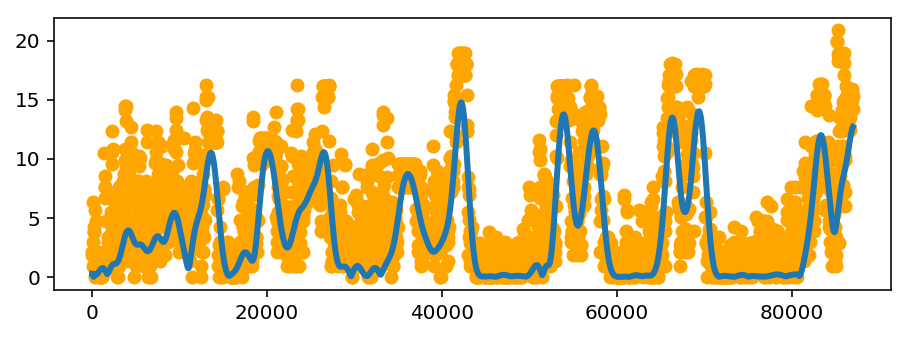

In [88]:
s = np.sqrt(np.diff(position_info.x_position) ** 2 + np.diff(position_info.y_position) ** 2) / dt
plt.figure(figsize=(7.5, 2.5))
plt.scatter(t, s[:3000], color='orange')
plt.plot(t, position_info.speed.values[:3000], linewidth=3, label='their speed');

### Kalman Filter, multiple position sensors

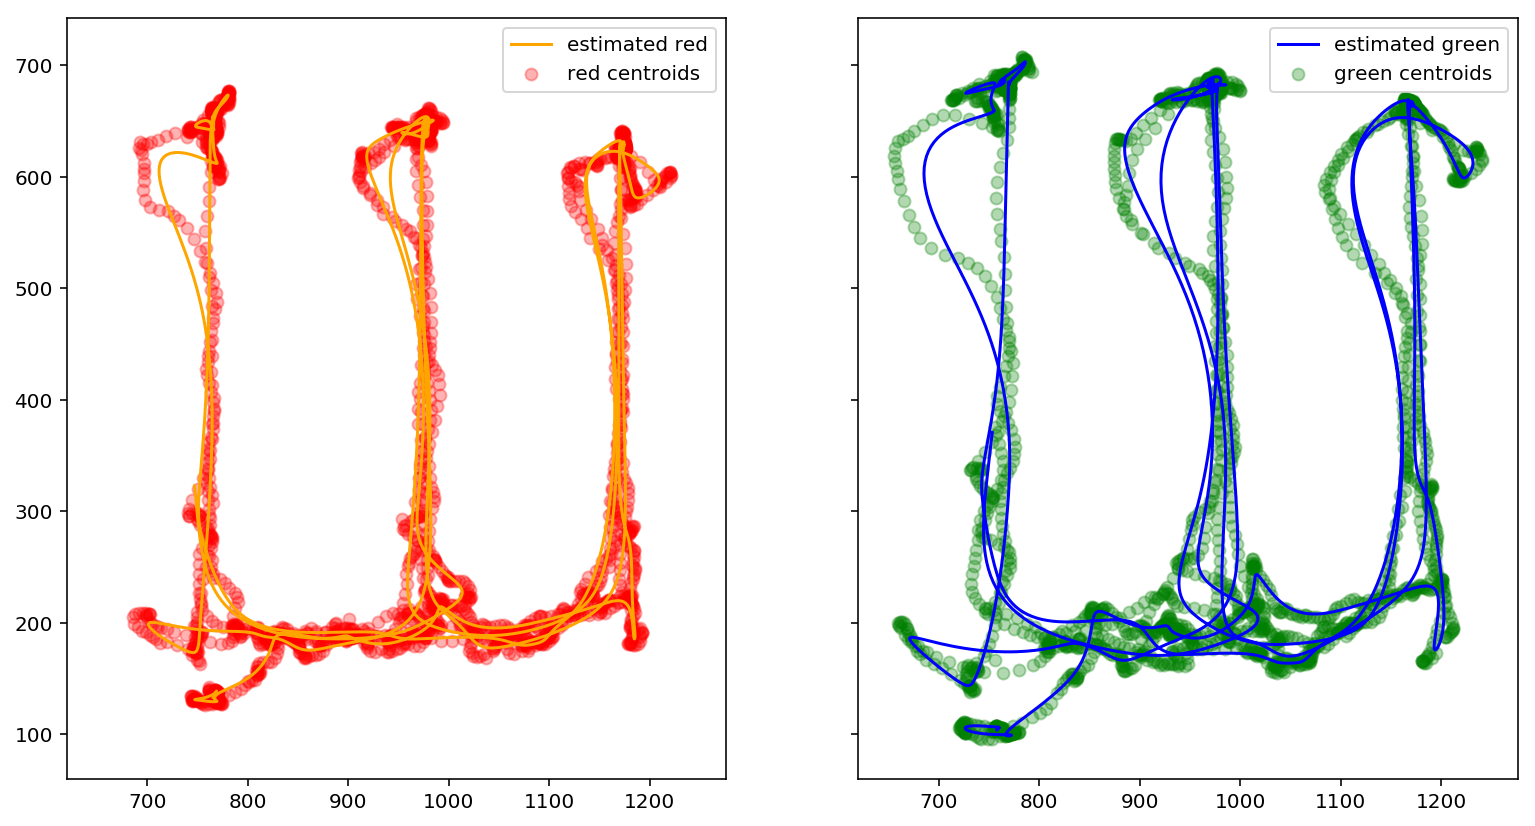

In [237]:
from scipy.linalg import block_diag

y2 = np.concatenate((red_centroid_over_time[:3000], green_centroid_over_time[:3000]), axis=1)

init_x2 = np.array([y2[0, 0], y2[0, 1], 0, 0, y2[0, 2], y2[0, 3], 0, 0])
init_P2 = np.diag([1, 1, 100, 100, 1, 1, 100, 100])

F2 = block_diag(F, F)
H2 = np.zeros((4, 8))
H2[:2, :2] = np.eye(2)
H2[2:, 4:6] = np.eye(2) 
Q2 = block_diag(Q, Q)
R2 = block_diag(R, R)



xs2, cov2 = kalman_filter2(y2, F2, H2, Q2, R2, init_x2, init_P2)
xs2, cov2 = rts_smoother(xs2, cov2, F2, Q2)

fig, axes = plt.subplots(1, 2, figsize=(13, 7), sharex=True, sharey=True)
axes[0].scatter(y2[:, 0], y2[:, 1], color='red', label='red centroids', alpha=0.3)
axes[0].plot(xs2[:, 0], xs2[:, 1], label='estimated red', color='orange')
axes[0].legend();

axes[1].scatter(y2[:, 2], y2[:, 3], color='green', label='green centroids', alpha=0.3)
axes[1].plot(xs2[:, 4], xs2[:, 5], label='estimated green', color='blue')
axes[1].legend();

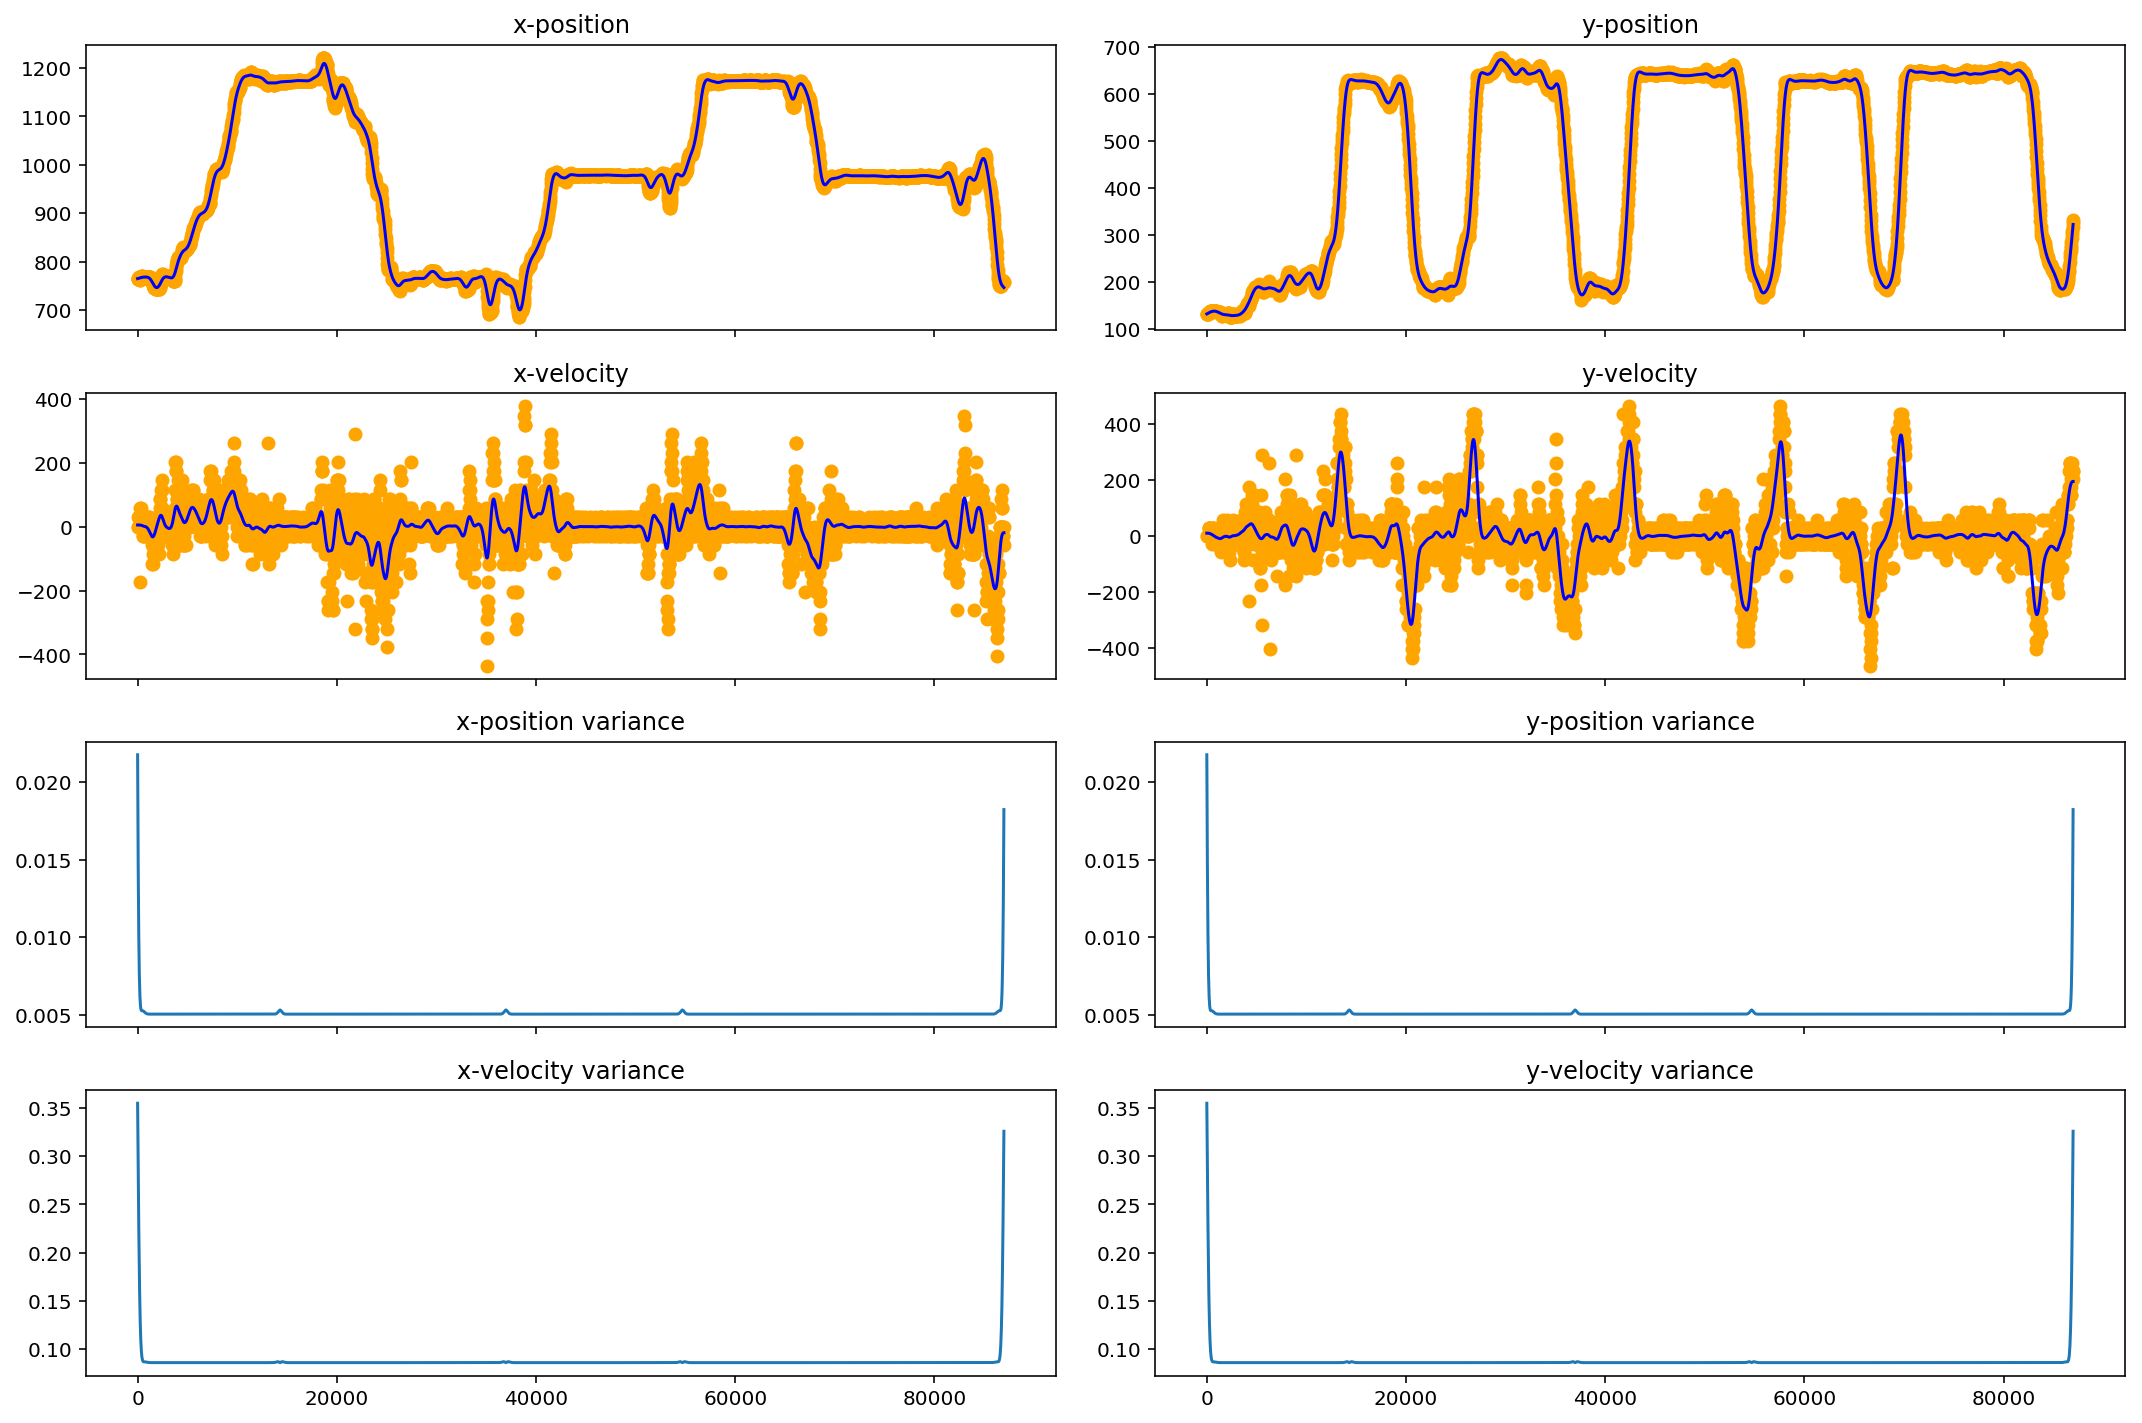

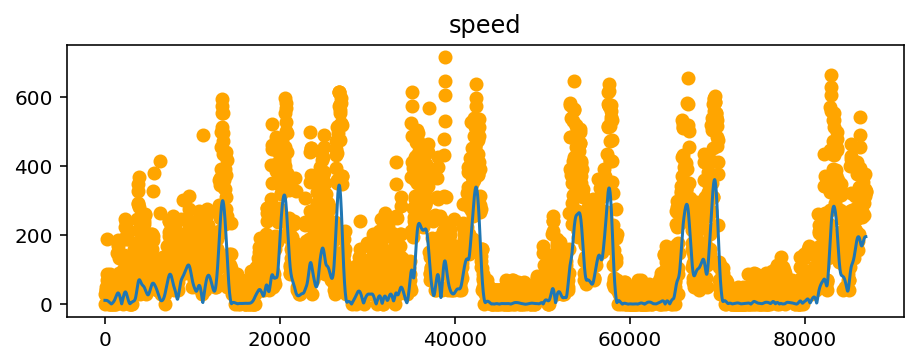

In [239]:
def estimate_speed(y, dt):
    distance = np.sqrt(np.sum(np.diff(y, axis=0) ** 2, axis=1))
    speed = distance / dt
    return np.concatenate((np.full((1,), np.nan), speed))

def estimate_velocity(y, dt):
    v = np.diff(y, axis=0) / dt
    return np.concatenate((np.full((1, y.shape[1]), np.nan), v))

fig, axes = plt.subplots(4, 2, figsize=(15, 10), sharex=True)
t = np.arange(y2.shape[0]) / dt

axes[0, 0].scatter(t, y2[:, 0], color='orange', label='input data')
axes[0, 0].plot(t, xs2[:, 0], color='blue', label='estimated position')
axes[0, 0].set_title('x-position')

axes[0, 1].scatter(t, y2[:, 1], color='orange', label='input data')
axes[0, 1].plot(t, xs2[:, 1], color='blue', label='estimated position')
axes[0, 1].set_title('y-position')

v = estimate_velocity(y2, dt)

axes[1, 0].scatter(t, v[:, 0], color='orange', label='input data')
axes[1, 0].plot(t, xs2[:, 2], color='blue', label='estimated position')
axes[1, 0].set_title('x-velocity')

axes[1, 1].scatter(t, v[:, 1], color='orange', label='input data')
axes[1, 1].plot(t, xs2[:, 3], color='blue', label='estimated position')
axes[1, 1].set_title('y-velocity')

axes[2, 0].plot(t, cov2[:, 0, 0])
axes[2, 0].set_title('x-position variance')

axes[2, 1].plot(t, cov2[:, 1, 1])
axes[2, 1].set_title('y-position variance')

axes[3, 0].plot(t, cov2[:, 2, 2])
axes[3, 0].set_title('x-velocity variance')

axes[3, 1].plot(t, cov2[:, 3, 3])
axes[3, 1].set_title('y-velocity variance')

plt.tight_layout()

s = estimate_speed(y2, dt)
speed = np.sqrt(np.sum(xs2[:, 2:4] ** 2, axis=1))

plt.figure(figsize=(7.5, 2.5))
plt.scatter(t, s, color='orange')
plt.plot(t, speed)
plt.title('speed');

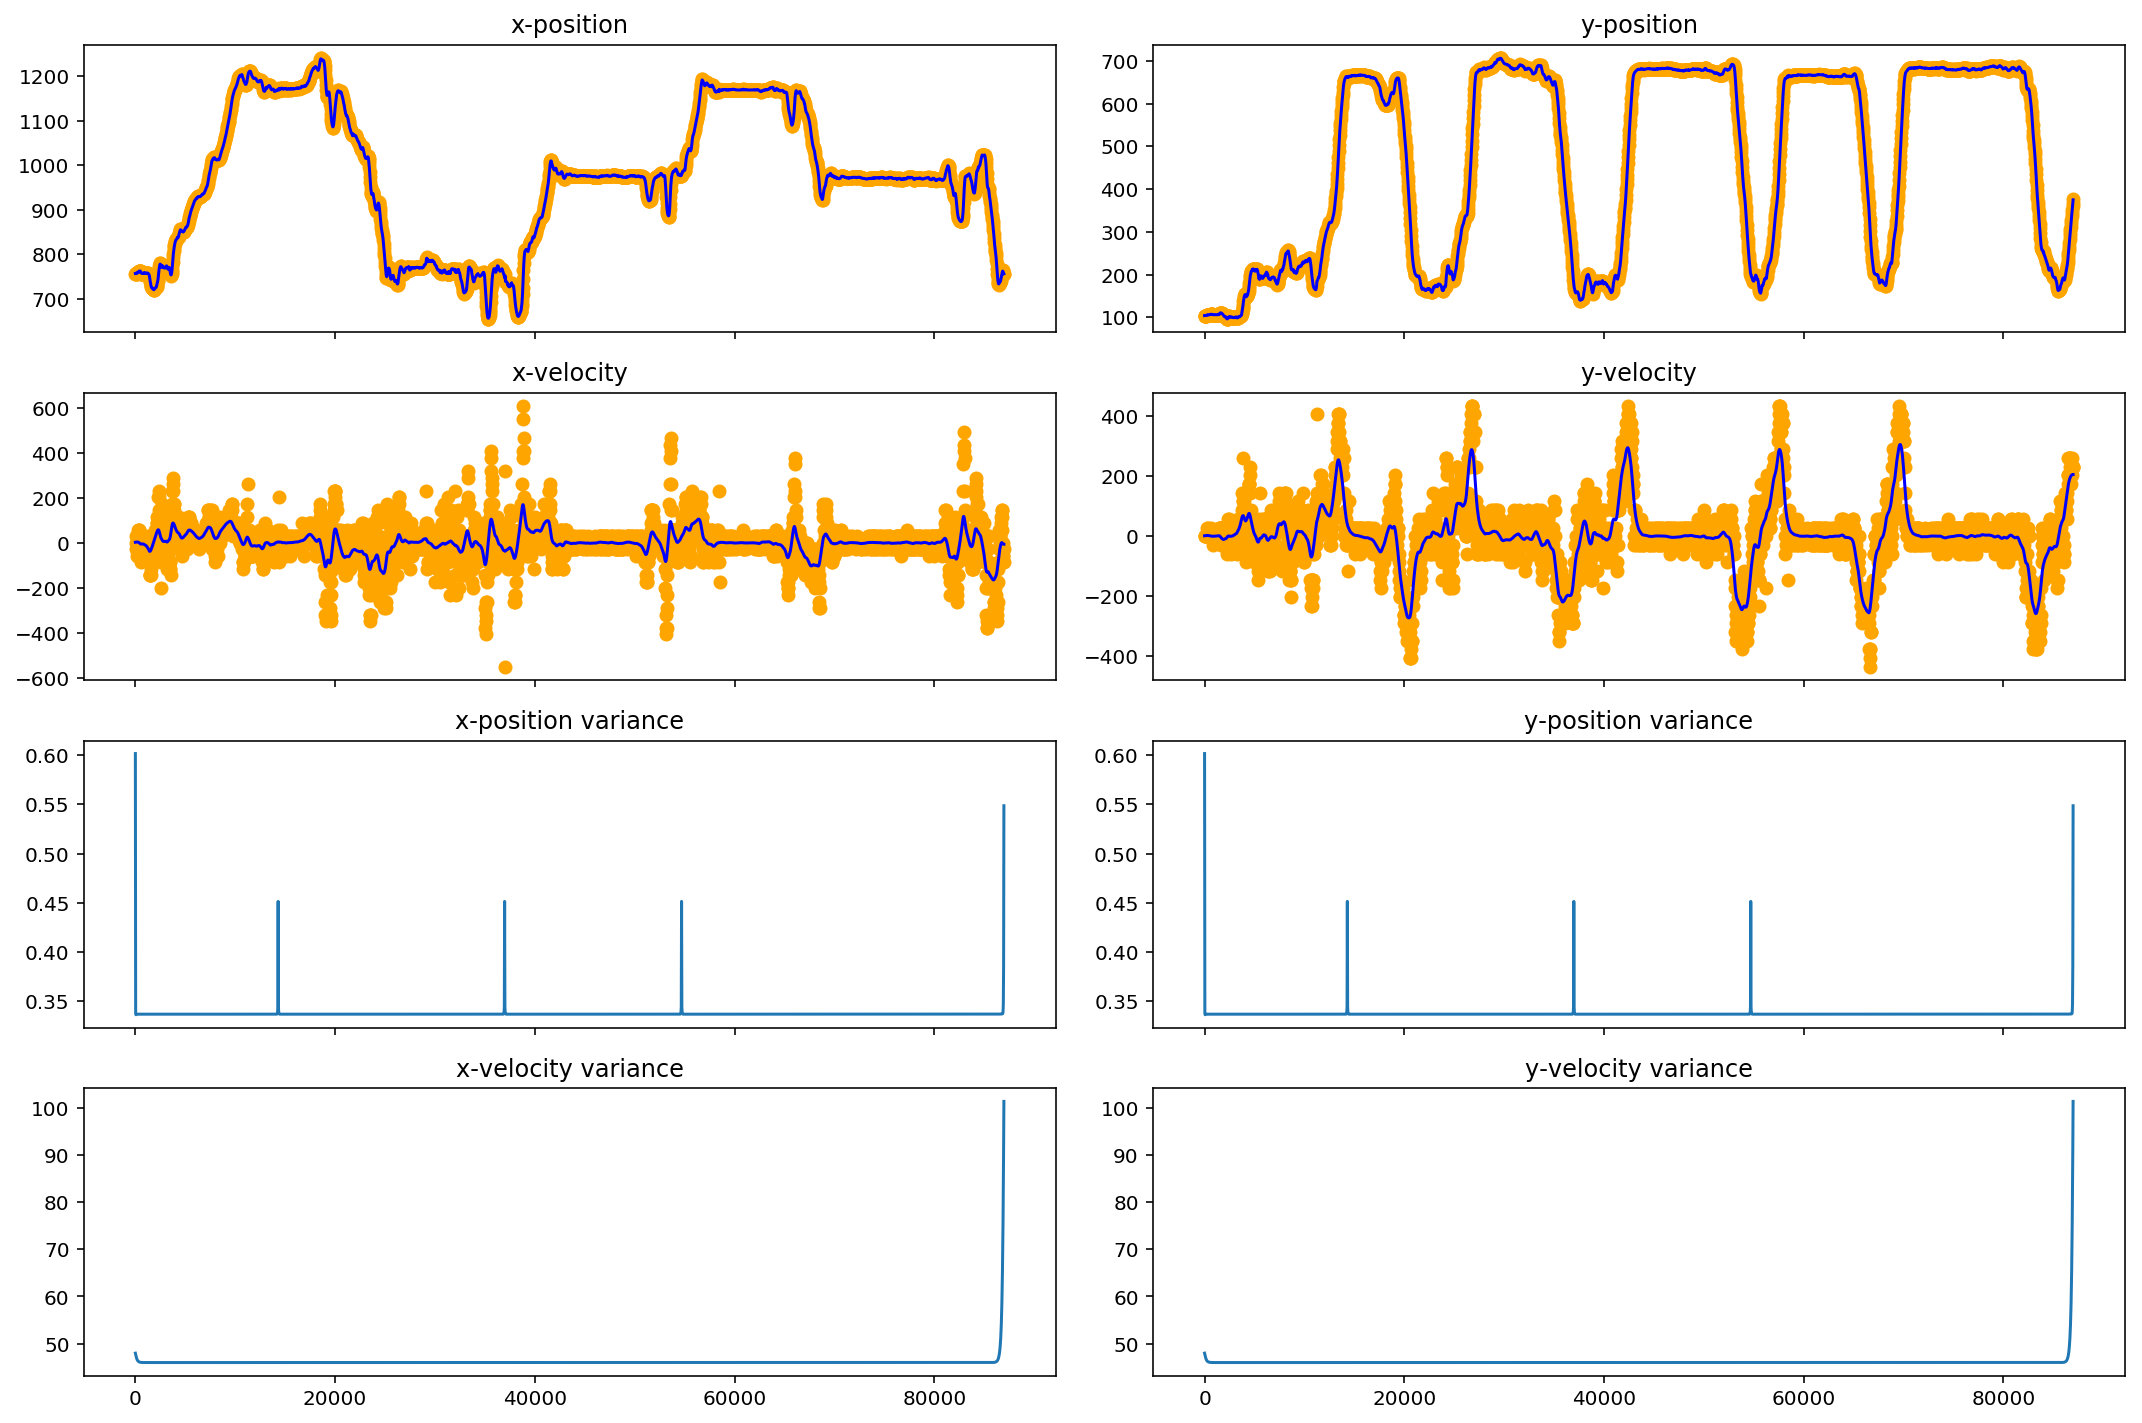

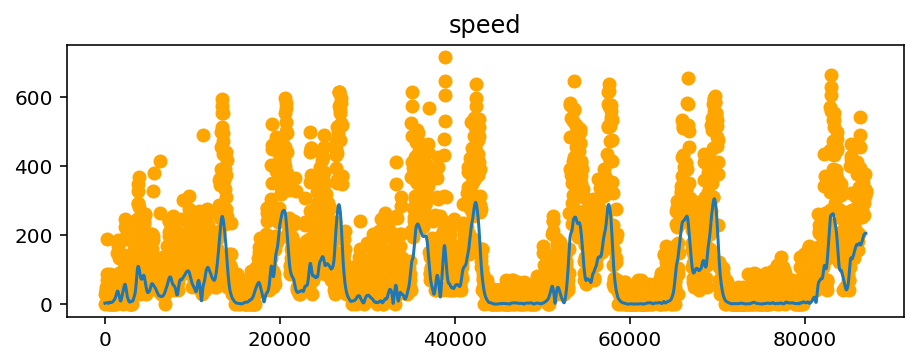

In [236]:
def estimate_speed(y, dt):
    distance = np.sqrt(np.sum(np.diff(y, axis=0) ** 2, axis=1))
    speed = distance / dt
    return np.concatenate((np.full((1,), np.nan), speed))

def estimate_velocity(y, dt):
    v = np.diff(y, axis=0) / dt
    return np.concatenate((np.full((1, y.shape[1]), np.nan), v))

fig, axes = plt.subplots(4, 2, figsize=(15, 10), sharex=True)
t = np.arange(y2.shape[0]) / dt

axes[0, 0].scatter(t, y2[:, 0 + 2], color='orange', label='input data')
axes[0, 0].plot(t, xs2[:, 0 + 4], color='blue', label='estimated position')
axes[0, 0].set_title('x-position')

axes[0, 1].scatter(t, y2[:, 1 + 2], color='orange', label='input data')
axes[0, 1].plot(t, xs2[:, 1 + 4], color='blue', label='estimated position')
axes[0, 1].set_title('y-position')

s = estimate_speed(y2, dt)
v = estimate_velocity(y2, dt)

axes[1, 0].scatter(t, v[:, 0 + 2], color='orange', label='input data')
axes[1, 0].plot(t, xs2[:, 2 + 4], color='blue', label='estimated position')
axes[1, 0].set_title('x-velocity')

axes[1, 1].scatter(t, v[:, 1 + 2], color='orange', label='input data')
axes[1, 1].plot(t, xs2[:, 3 + 4], color='blue', label='estimated position')
axes[1, 1].set_title('y-velocity')

axes[2, 0].plot(t, cov2[:, 0 + 4, 0 + 4])
axes[2, 0].set_title('x-position variance')

axes[2, 1].plot(t, cov2[:, 1 + 4, 1 + 4])
axes[2, 1].set_title('y-position variance')

axes[3, 0].plot(t, cov2[:, 2 + 4, 2 + 4])
axes[3, 0].set_title('x-velocity variance')

axes[3, 1].plot(t, cov2[:, 3 + 4, 3 + 4])
axes[3, 1].set_title('y-velocity variance')

plt.tight_layout()

s = estimate_speed(y2, dt)
speed = np.sqrt(np.sum(xs2[:, 6:] ** 2, axis=1))

plt.figure(figsize=(7.5, 2.5))
plt.scatter(t, s, color='orange')
plt.plot(t, speed)
plt.title('speed');

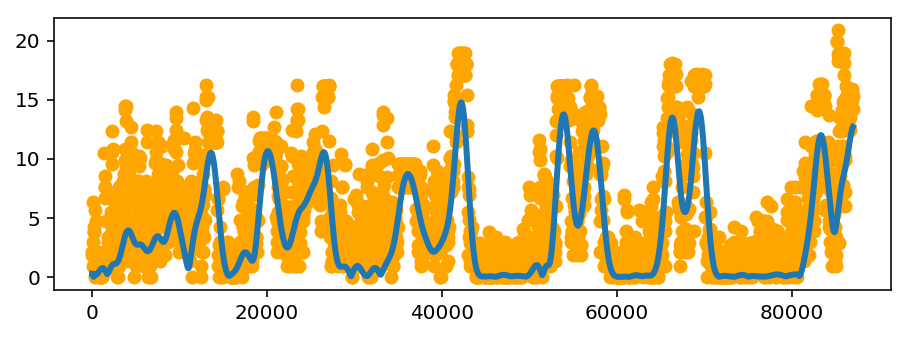

In [22]:
s = np.sqrt(np.diff(position_info.x_position) ** 2 + np.diff(position_info.y_position) ** 2) / dt
plt.figure(figsize=(7.5, 2.5))
plt.scatter(t, s[:3000], color='orange')
plt.plot(t, position_info.speed.values[:3000], linewidth=3, label='their speed');